### Proyecto Integrador

Lectura de Librerias

In [2]:
#Carga de Liberias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Avance 1

Se realiza la lectura del archivo csv proporcionado 

In [3]:
data = pd.read_csv("data_latinoamerica.csv",sep=',')

Uso de la función "Head" de pandas para visualizar los primeros cinco valores del dataset 

In [ ]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

Comprobación de que el dataset cargado tenga la cantidad de registros y columnas especificadas

In [ ]:
np.shape(data)

(12216057, 50)

Selección de los paises donde se expandiran: Colombia, Argentina, Chile, México, Perú y Brazil

In [ ]:
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

Verificación de que el filtro se aplicó correctamente

In [ ]:
np.shape(data_latinoamerica)

(11970289, 50)

Como se puede observar la reducción de los datos no fue considerable a pesar del filtro aplicado, por lo cual se opta por verificar los valores nulos mayores a 4 millones

In [ ]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Se confirma que la calidad de los datos no es optima debido a los valores nulos altos, por lo cual no se pueden aplicar medidas de tendencia central de manera eficiente, por lo cual se realiza un proceso de iteración del dataset para confirmar valores únicos

In [ ]:
data_latinoamerica.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_140       991
AR_A_147       991
AR_A_154       991
AR_A_161       991
AR_B           991
Name: count, Length: 12079, dtype: int64

Se realizó una revision de calidad de datos en la columna: location_key en la cual se confirmó que no habia valores unicos y que por ejemplo en Argentina se encontraban filas nombradas de forma diferente al código del pais como AR_A, por lo cual se vuelve a iterar sobre el filtro previamente usando la columna de coutry_code

In [ ]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

data_latinoamerica_paises.shape

(5946, 50)

Se aplica el filtro a las fechas mayores a 2021-01-01

In [ ]:
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

Teniendo el nuevo filtro aplicado, se vuelve a iterar sobre la calidad de los datos para encontrar valores nulos y proceder a eliminarlos

In [ ]:
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


Se realiza identificación del index de las columnas donde se identificaron los datos nulos

In [ ]:
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

Se realiza una revisión del Dataset, enfocada a estas columnas y se opta por obtener el promedio de las mismas. Para confirmar al momento de realizar el ciclo for cuales necesitan de la función round para reducir sus decimales. 
A continuación se muestran las columnas que por sus resultados requieren de esta función para reducir sus decimales.

In [ ]:
data_latinoamerica_paises_fecha.new_confirmed.mean()

np.float64(13936.279613215149)

In [ ]:
data_latinoamerica_paises_fecha.average_temperature_celsius.mean


<bound method Series.mean of 367         27.740741
368         21.956790
369         24.894444
370         20.104938
371         20.919753
              ...    
10253872    30.500000
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: average_temperature_celsius, Length: 3744, dtype: float64>

In [ ]:
data_latinoamerica_paises_fecha.minimum_temperature_celsius.mean

<bound method Series.mean of 367         18.098765
368         17.950617
369         18.072222
370         16.135802
371         13.290123
              ...    
10253872    25.666667
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: minimum_temperature_celsius, Length: 3744, dtype: float64>

In [ ]:
data_latinoamerica_paises_fecha.maximum_temperature_celsius.mean

<bound method Series.mean of 367         33.962963
368         33.456790
369         30.244444
370         30.685185
371         26.580247
              ...    
10253872    34.666667
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: maximum_temperature_celsius, Length: 3744, dtype: float64>

In [ ]:
data_latinoamerica_paises_fecha.rainfall_mm.mean

<bound method Series.mean of 367          0.000000
368         13.144500
369          1.498600
370          8.286750
371          5.108222
              ...    
10253872     0.000000
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: rainfall_mm, Length: 3744, dtype: float64>

In [ ]:
data_latinoamerica_paises_fecha.relative_humidity.mean

<bound method Series.mean of 367         43.581350
368         74.880846
369         60.805923
370         72.972595
371         52.241997
              ...    
10253872    60.851205
10253873          NaN
10253874          NaN
10253875          NaN
10253876          NaN
Name: relative_humidity, Length: 3744, dtype: float64>

Luego de  confirmar cuales eran las columnas que necesitaban la funcion round, nos disponemos a realizar el ciclo for para completar los valores nulos de la media de cada país

In [ ]:
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_confirmed'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_confirmed'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_confirmed'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_deceased'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_deceased'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_deceased'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_confirmed'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_confirmed'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_deceased'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_deceased'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_deceased'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_vaccine_doses_administered'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_vaccine_doses_administered'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'average_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'average_temperature_celsius'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'average_temperature_celsius'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'minimum_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'minimum_temperature_celsius'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'minimum_temperature_celsius'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'maximum_temperature_celsius'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'maximum_temperature_celsius'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'maximum_temperature_celsius'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'rainfall_mm'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'rainfall_mm'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'rainfall_mm'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'relative_humidity'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'relative_humidity'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'relative_humidity'].mean(), 2))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_recovered'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'new_recovered'].fillna(0)
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_recovered'] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, 'cumulative_recovered'].fillna(0)

Se confirma que el dataset no tiene valores nulos, se realiza el proceso de relleno con el promedio y el algunos casos con el valor cero dependiendo del tipo de dato. 

In [ ]:
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

Series([], dtype: int64)
(3744, 50)


Se guarda el dataset filtrado por la fecha en un archivo csv para seguirlo utilizando en el analisis, siendo este mas fácil de manejar y para evitar cargar nuevamente el archivo original

In [ ]:
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrado.csv",index=False)

Se reinicia el notebook para liberar memoria y cargar el archivo filtrado para continuar con el análisis

In [ ]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

Aplicación del bucle for para el cálculo de estadisticas descriptivas y otras métricas

In [ ]:
for i in data_latinoamerica_paises:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('----------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------------------------
new_confirmed
count      3744.000000
mean      13921.908929
std       24219.361379
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        1

Creación de funcion para obtener la a mediana, varianza y el rango, donde solo se muestren los valores numéricos y no los valores categóricos

In [ ]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('Varianza:',data[i].var())
            print('Rango',data[i].max()-data[i].min())
            print("Moda",data[i].mode())
            print('-----------------------------------')


describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana: 5214.0
Varianza: 586577465.6078758
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
-----------------------------------
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-----------------------------------
cumulative_deceased
M

### Avance 2

Se copia la lectura del archivo filtrado para continuar con el análisis 

In [ ]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

Se procede a realizar un análisis estadistico con Pandas y Numpy, usando un ciclo for para recorrer la columnas y obtener: media, mediana, desviación estandar, mínimo y máximo de cada columna

In [ ]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908929
std       24219.361379
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.0000

Se realiza el filtro por los paises que se solicitaron para el análisis

In [ ]:
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Se le adiciona un indide a la columna "Date" para poder realizar los análisis de datos a lo largo del tiempo

In [ ]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date',inplace=True)

Visualizaciones Realizadas

Gráficos de barras de paises contra el resto de las variables, teniendo en cuenta las variables que no aportaban al análisis, se les realizó un ciclo "For"

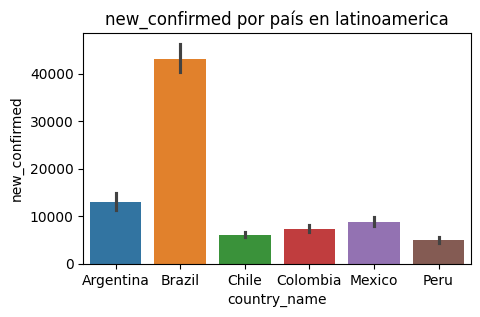

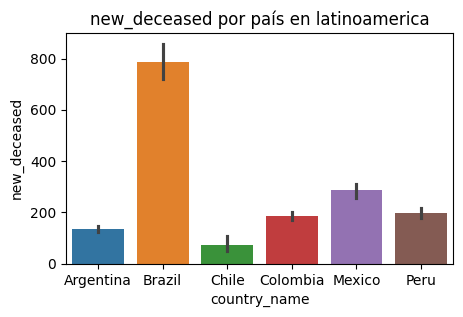

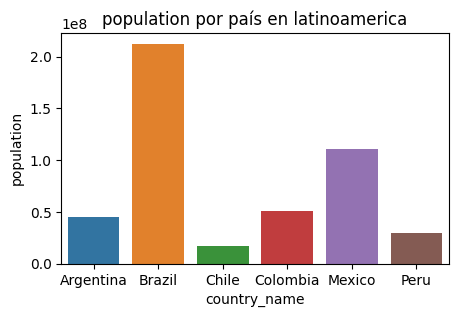

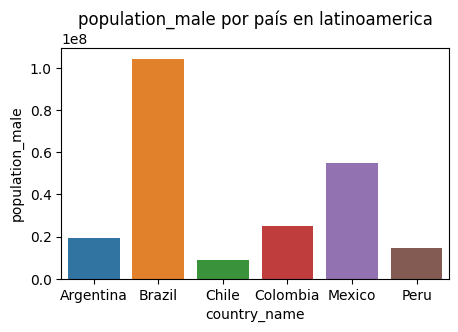

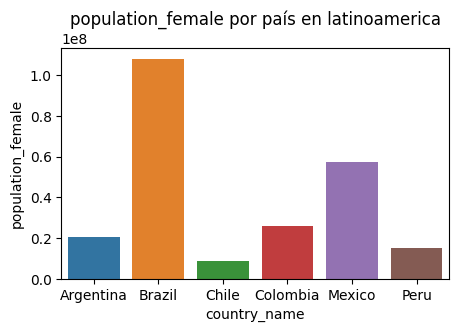

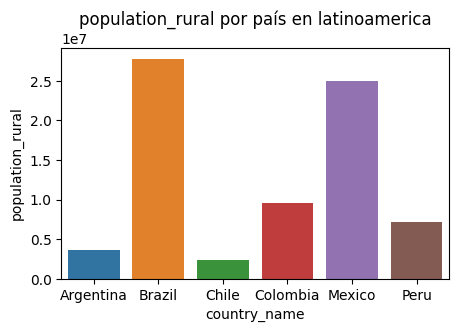

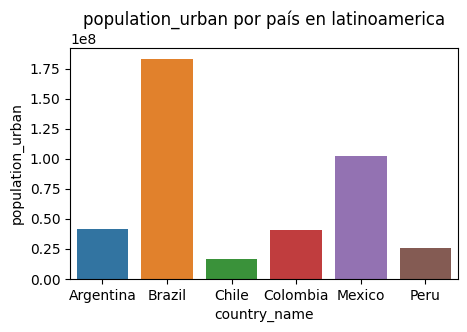

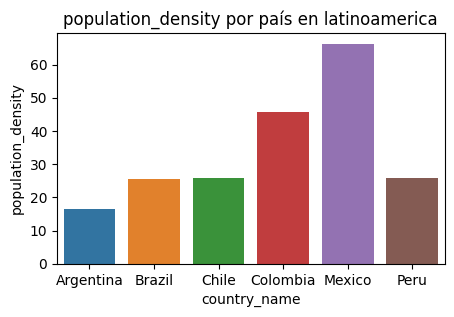

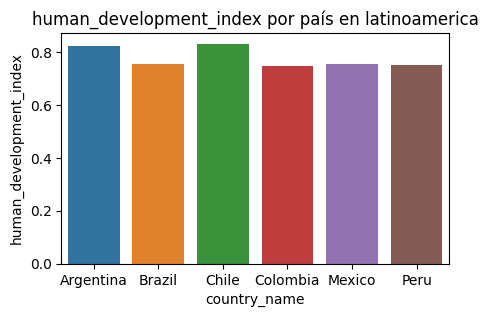

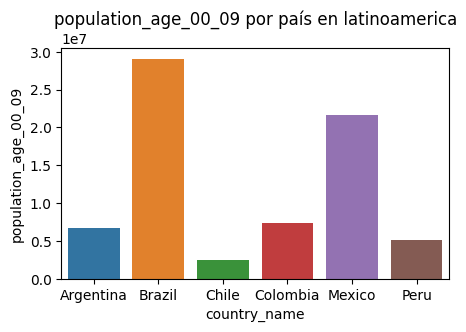

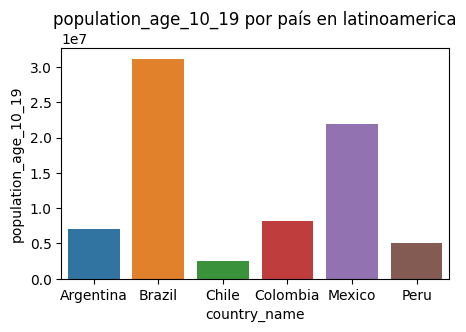

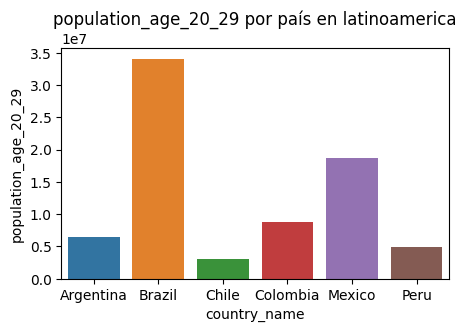

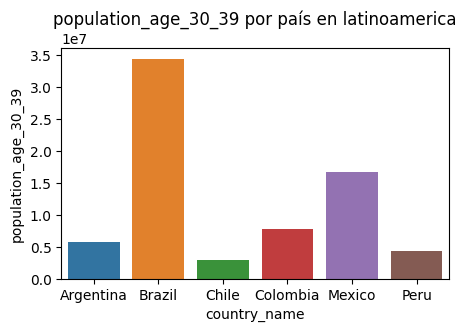

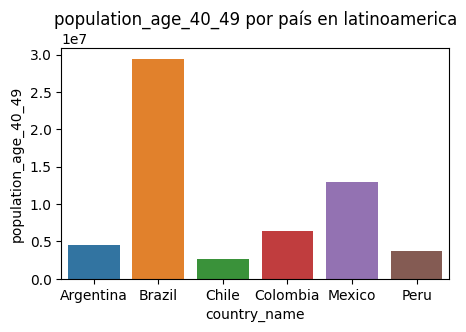

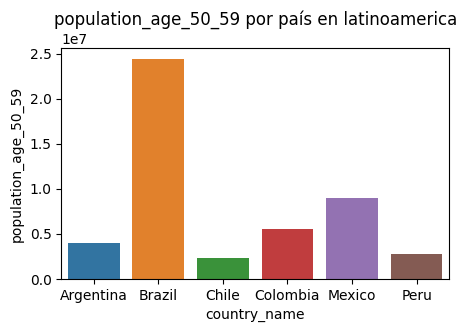

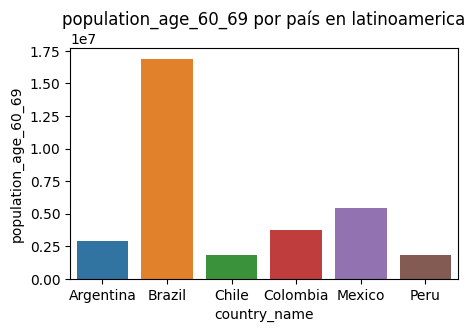

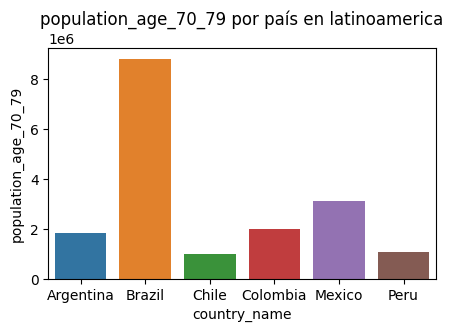

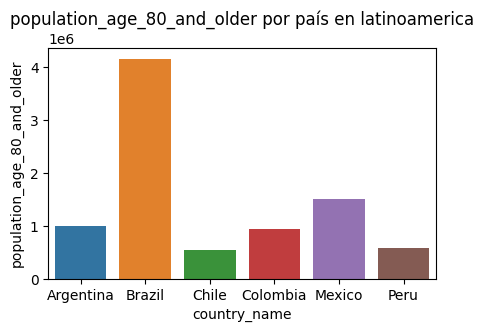

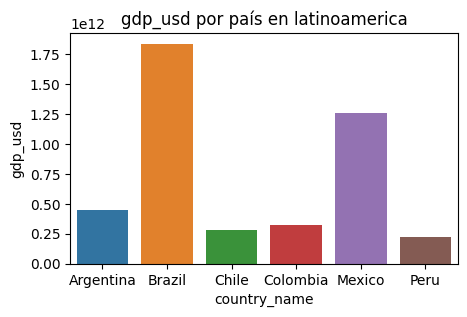

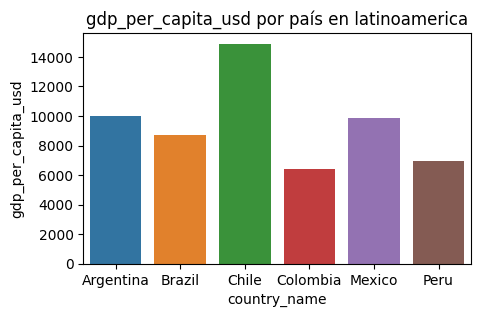

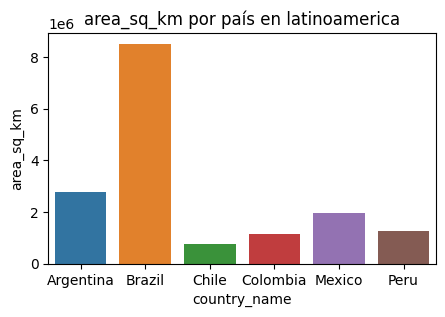

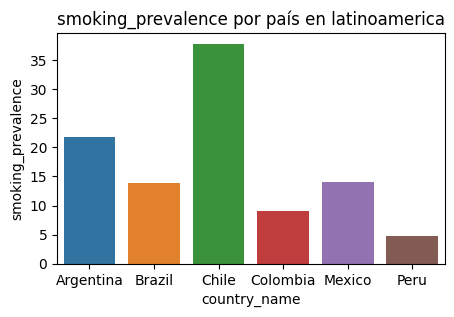

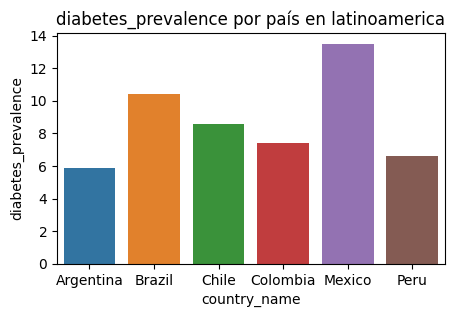

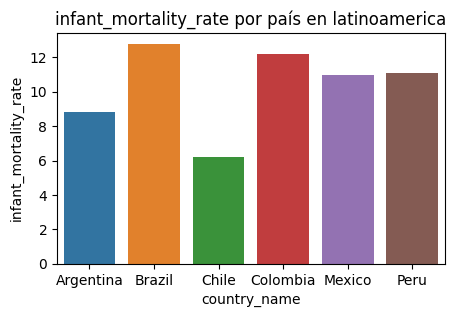

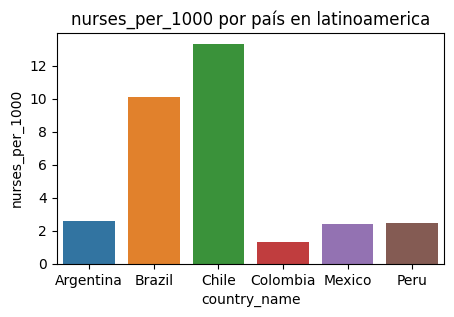

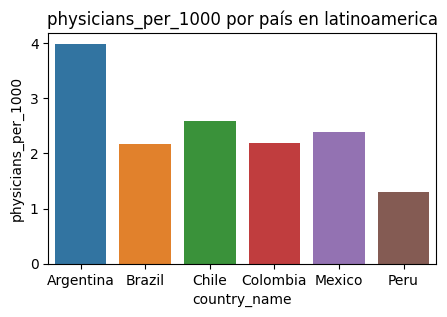

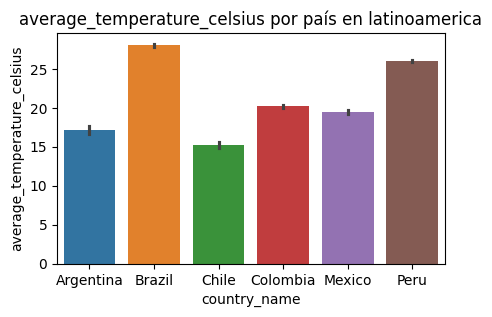

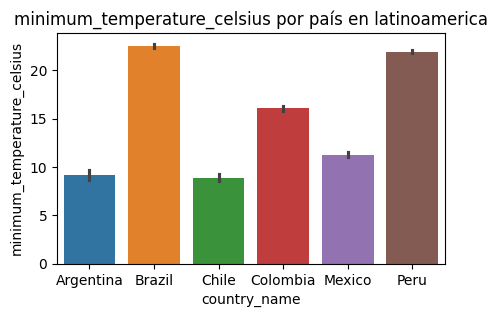

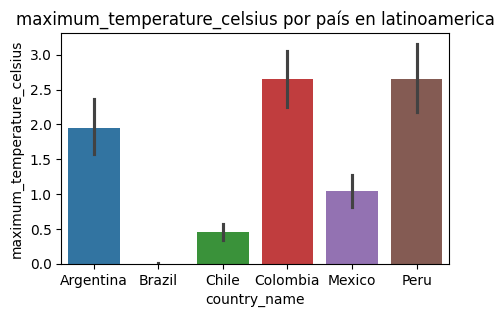

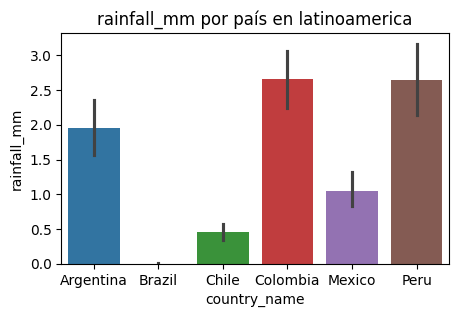

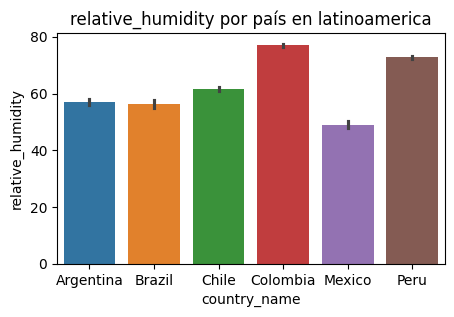

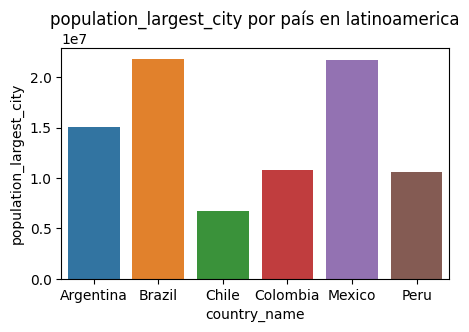

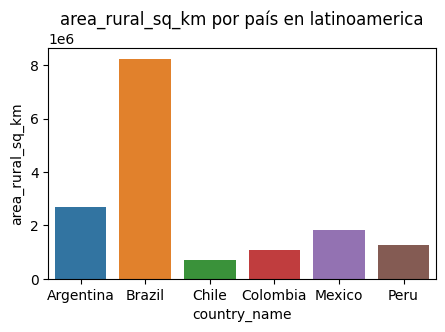

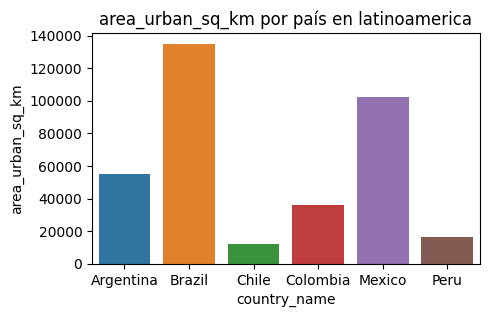

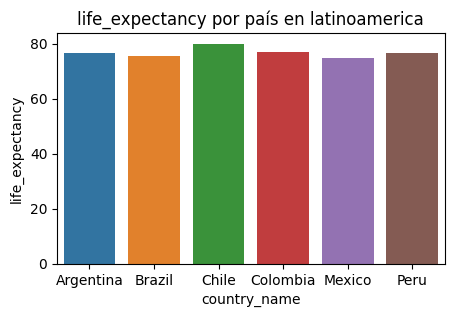

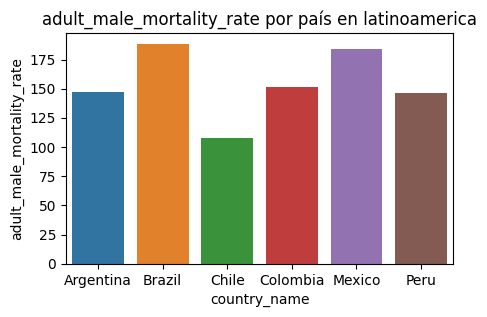

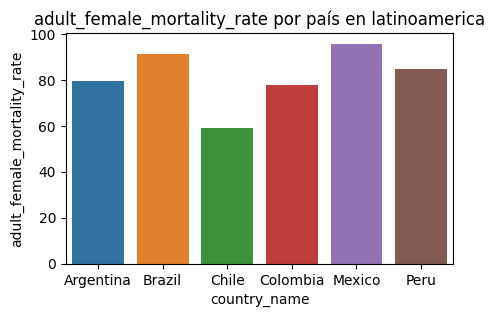

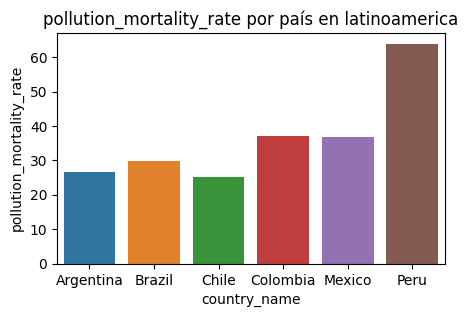

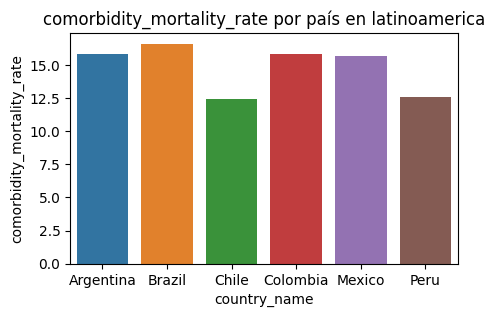

In [ ]:
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude',
                 'cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
                fig, ax= plt.subplots(figsize=(5,3))
                sns.barplot(x='country_name', y=i,data=data_latinoamerica_paises, ax=ax,hue='country_name')
                plt.title(f'{i} por país en latinoamerica')
                plt.show()

Teniendo en cuenta la premisa principal de este análisis, la cual es la expansión de laboratorios, se obtuvieron conclusiones inciales que pueden incidir en la toma de desiciones tales como:

* La alta densidad poblacional que presentan Brazil y México, como factores determinantes de propagacion del virus. 
* La alta poblacion vulnerable (niños - mayores de 65) que presenta Brazil como un factor que incide en las cifras de mortalidad del virus. 
* Las enfermedades base tales como diabetes y la prevalencia del tabaquismo que presentan México y Chile, las cuales pueden incidir en la gravedad de los sintomas y la mortalidad de las perosnas contagiadas. 
* Los altos niveles de contaminación de aire que presenta Perú, siendo este un factor que incide directamente en la propagración del virus debido a que las particulas contaminates pueden acutar como portadores del mismo. 
* Las bajas cifras de personal de salud tales como enfermeras para el tratamiento del virus en Colombia, lo que impacta negativamente en el tratamiento del virus, estancias hospitarias e infecciones. 
* Cabe destacar que factores como la temperatura en las fuentes consultadas no se considera que sea un factor modulador clave en la trasmisión del virus, varios estudios han encontrado que el virus se ha propagado de manera eficiente en una variedad de climas incluyendo los cálidos y tropicales. 

Se realiza una matriz de coorelación para confirmar si existe relación entre las variables y tenerlo en cuenta para un posterior análisis, asi mismo cuenta con un heatmap de métricas por país

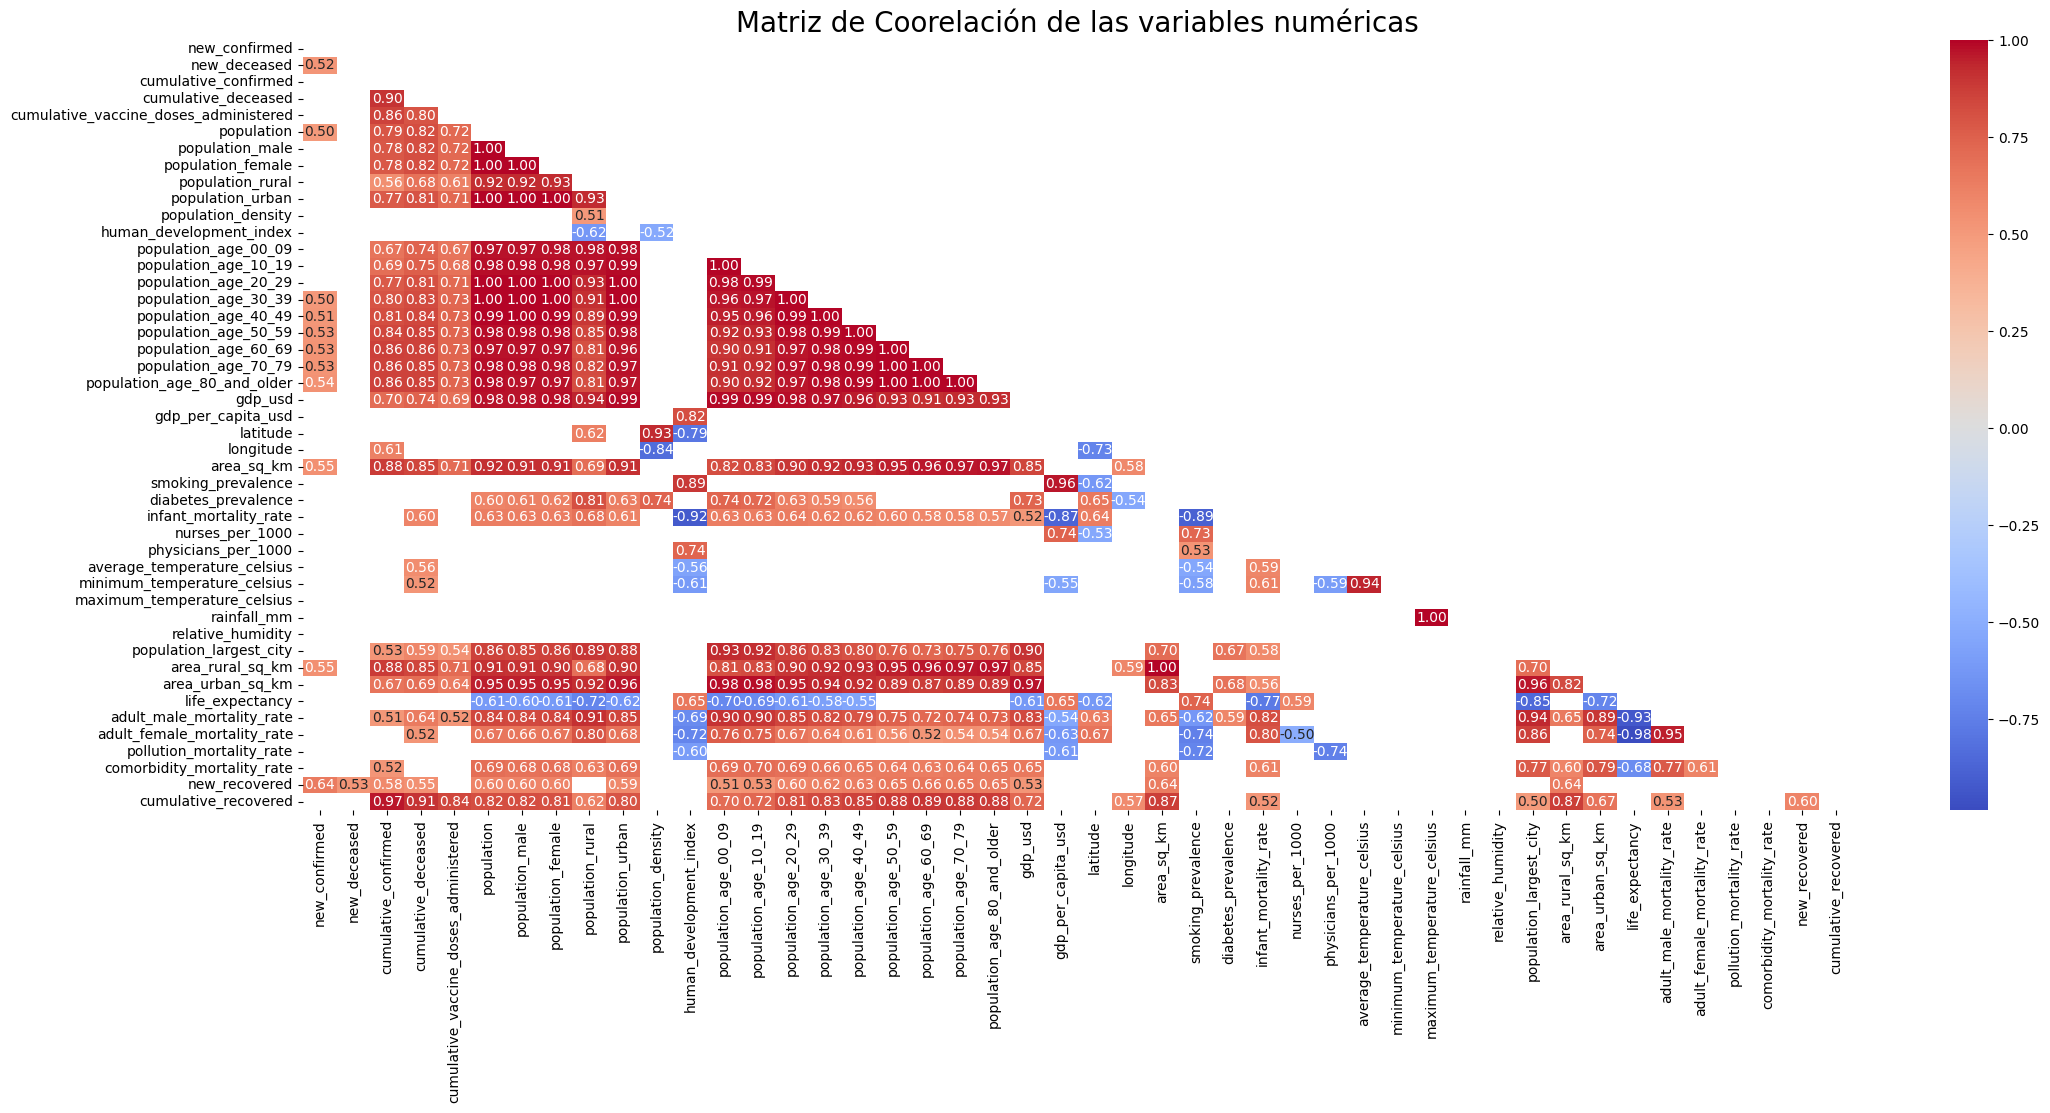

In [ ]:
#Creación de la matriz de coorelación de las variables numericas 
numeric_colums = data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_colums].corr()

#Creación de máscara para el triángulo superior 
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

#Mostar los valores superiores a 0.5 es decir donde hay una coorelación fuerte, mostrando también valores negativos
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

#Creación de la gráfica 
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Matriz de Coorelación de las variables numéricas',fontsize=20)
plt.show()

Se puede observar que las areas de mayor atención son las que se encuentran en los grupos poblacionales, lo cual indica que es una de las variables que se puede comparar con las otras que proporciona el Dataset, tambien se puede destacar las variables poblacionales tanto generales como de genero las cuales a su vez se relacionan con las tasas de mortalidad. 

Histograma de variables que "Si" tengan cambios de valores, se itera sobre el dataset para confirmar las variables con esta condición para crear histográmas de las variables numéricas

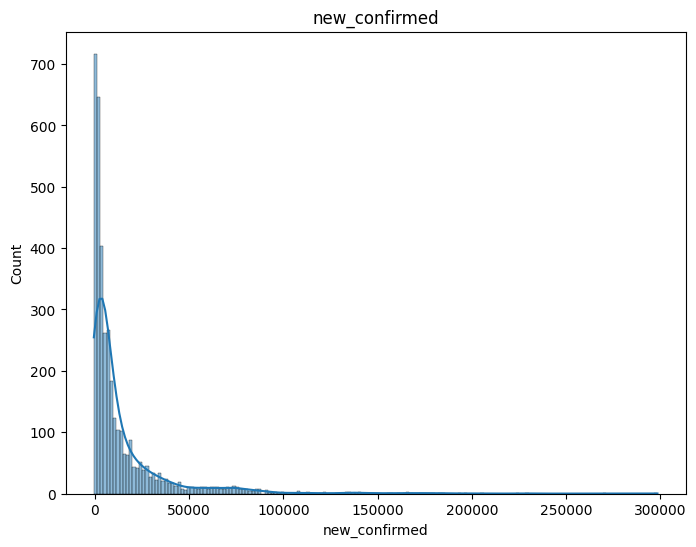

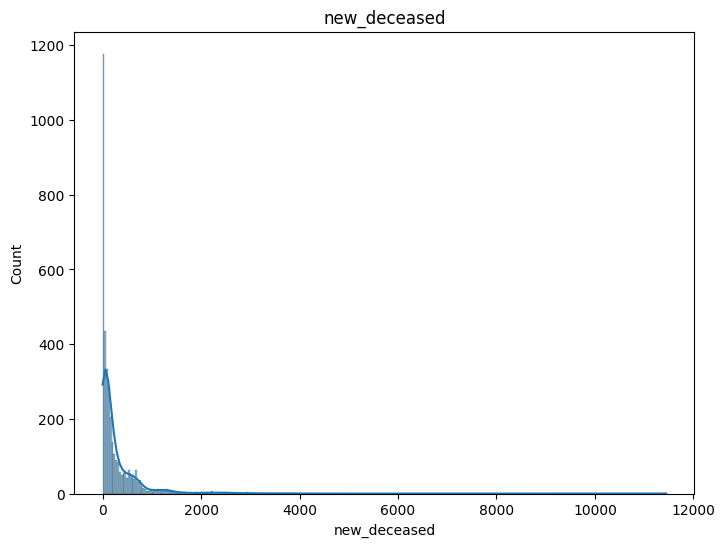

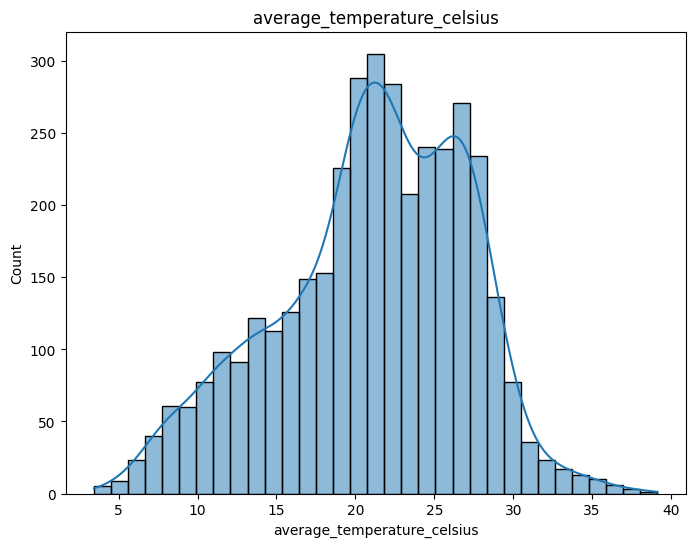

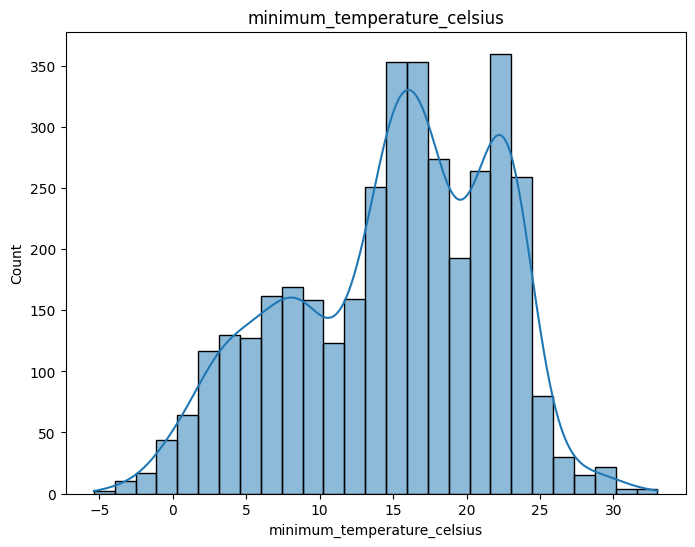

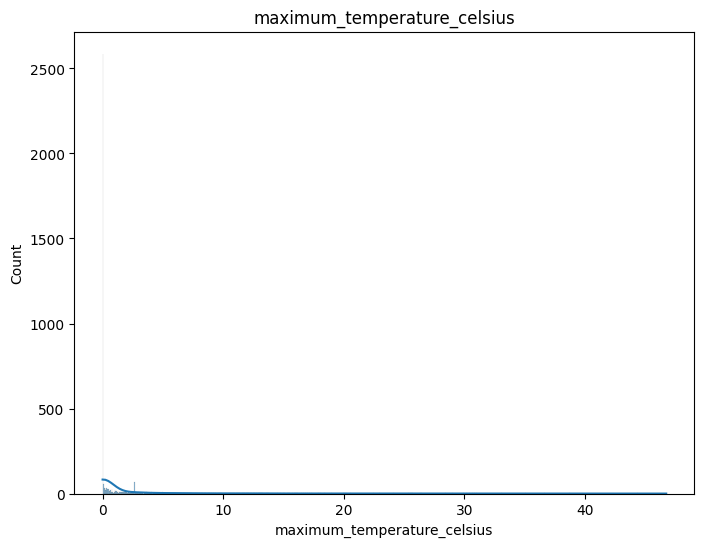

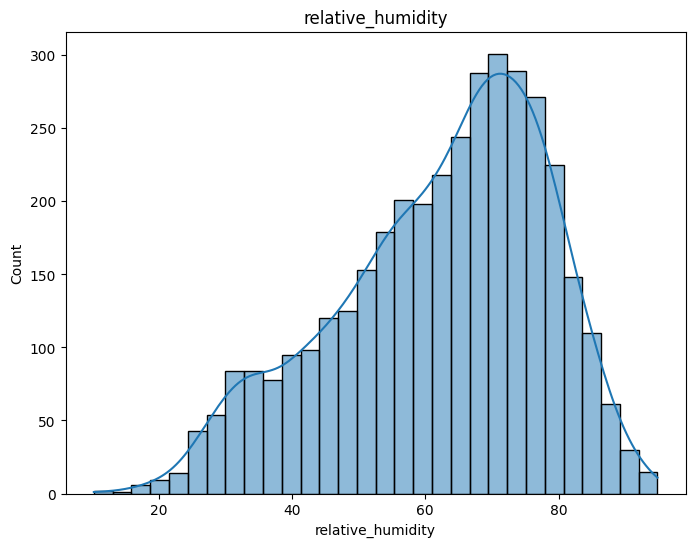

In [ ]:
lista_columnas_6 = ["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                    "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                    "maximum_temperature_celsius","relative_humidity"]

#Creación de histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude',
                 'cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered']:
                fig, ax= plt.subplots(figsize=(8,6))
                sns.histplot(data_latinoamerica_paises [i],kde=True)
                plt.title(i)
                plt.show()


Se puede observar que algunas gráficas no se presentan correctamente y esto se debe a la ausencia de datos que a pesar de los procesos de limpieza, se continuan presentando inconsistencias. Se puede destacar de estos gráficos las altas cifras de humedad relativa que según las fuentes consultadas podria reducir la viabilidad del virus en el aire al sobrevivir menos tiempo, se siguen destacando como principales factores de transmición la interacción social, el no usar mascarillas y la ventilación. 

Diagrama de dispersión de la temperatura media contra los casos confirmados

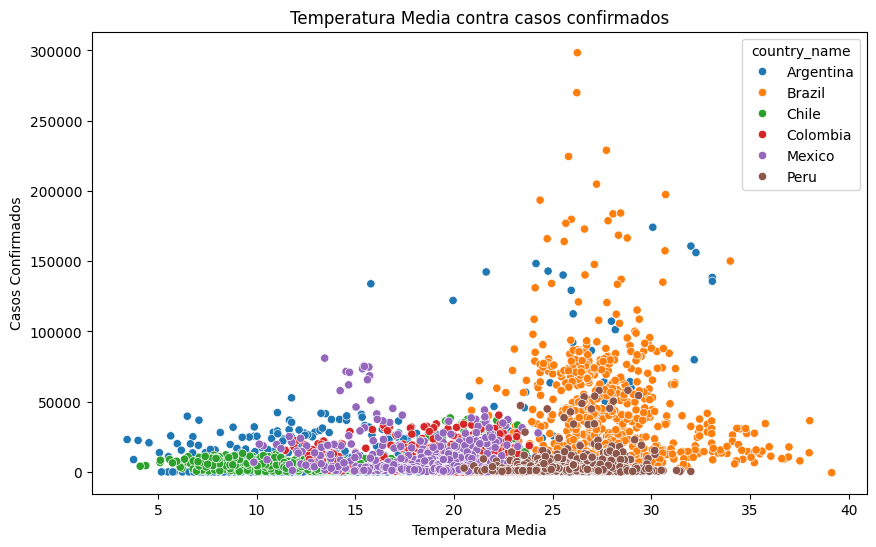

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x= "average_temperature_celsius", y="new_confirmed", data=data_latinoamerica_paises, hue="country_name")
plt.title("Temperatura Media contra casos confirmados")
plt.xlabel("Temperatura Media")
plt.ylabel("Casos Confirmados")


plt.show()

Como se ha expresado con anterioridad la temperatura no tiene alta incidencia en los casos confirmados del virus y esto se puede observar en la concentración en el primer nivel inferior a los 50.000 casos confirmados, los puntos altos que se presentan en Brazil podrian llegar a ser valores atípicos. 

Diagrama de dispersión de la temperatura media contra las muertes confirmadas

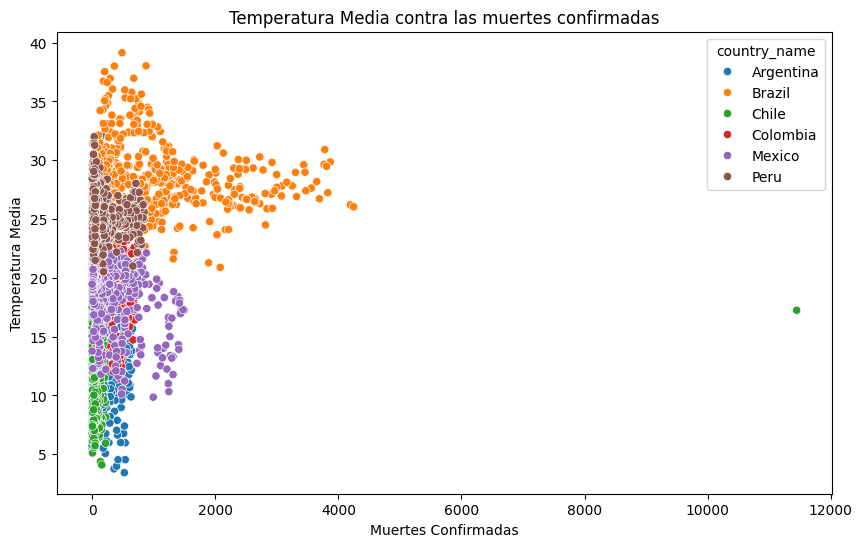

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(y= "average_temperature_celsius", x="new_deceased", data=data_latinoamerica_paises, hue="country_name")
plt.title("Temperatura Media contra las muertes confirmadas")
plt.ylabel("Temperatura Media")
plt.xlabel("Muertes Confirmadas")

plt.show()

Se mantiene la misma tendencia que en el gráfico anterior, se puede observar la incidencia de Brazil respecto a los otros paises debido a que su poblacion es mayor respecto a la de otros paises por cual incide en las cifras de muertes confirmadas

Comportamiento de las dosis administradas de todos los países (Valor medio)

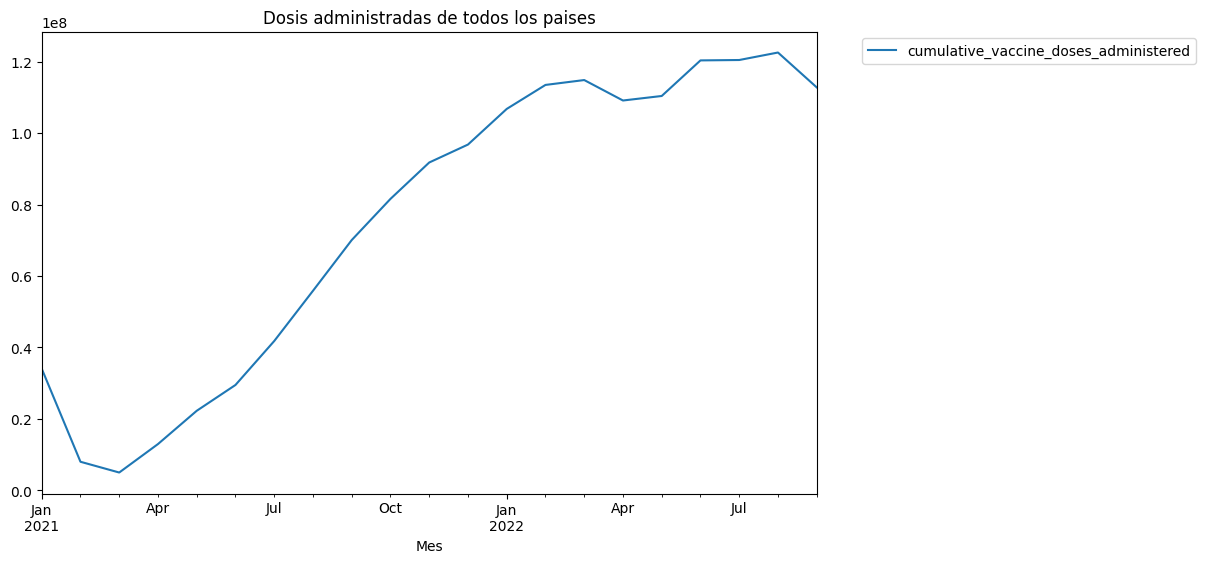

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Dosis administradas de todos los paises')
plt.xlabel("Mes")
plt.show()

Se puede observar un crecimiento en las dosis administradas, lo cual se puede deber a las políticas de vacunación que se implementaron en cada país, el descenso al principio se puede deber a la tendencia de vacunar primero al personal médico y personas con alto riesgo, es importante destacar que al final la tendencia desciende, lo cual puede deberse a que la mayoría de las personas  ya se vacunó o puede no hacerlo debido a que les dió el virus, adquiriendo naturalmente inmunidad del mismo y no deseen vacunarse. 

Para tener un mejor entendimiento del comportamiento por paises, se generó una gráfica de manera individual, creando un ciclo "for"

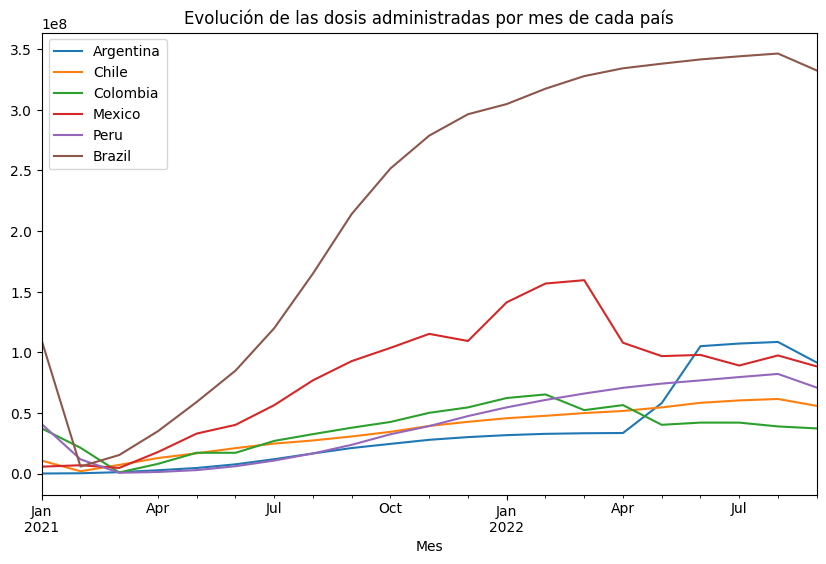

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de las dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel("Mes")
plt.show()

El repunte de Brazil se puede deber a su población respecto a otros países, así msimo cabe destacar la paridad que presentan Chile, Perú y Colombia, se destaca el aumento de México y Argentina en las dosis administradas, también el descenso en Colombia lo cual se puede deber a diversos factores como la disponibilidad de las vacunas, los mitos alrededor de las mismas y la cobertura de los sitemas de salud. 

Muertes por mes de cada país 

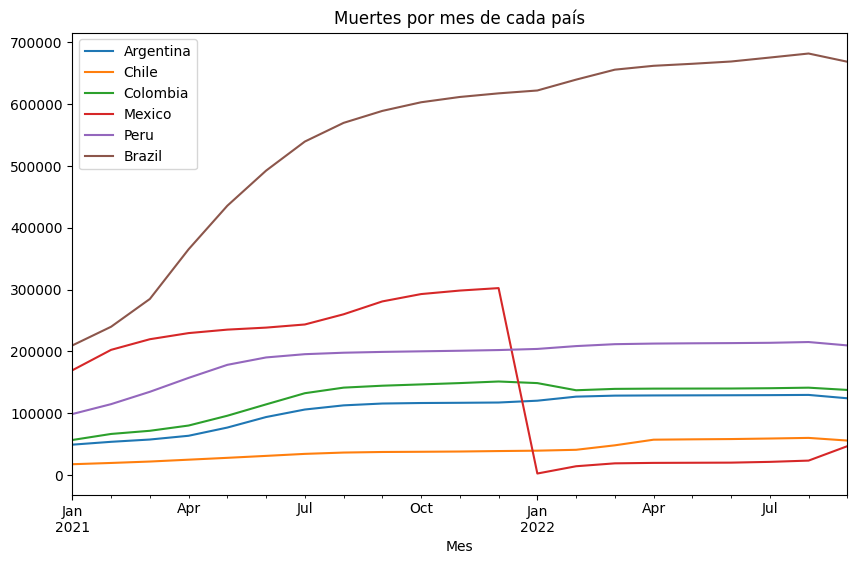

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel("Mes")
plt.show()

Se puede observar el aumento exponencial en Brazil, lo que puede incidir en que las políticas incrementadas tanto en prevención como en tratamiento del virus no tuvieron efecto, caso contrario al de México, donde se notó un descenso considerable, respecto a los demás países, la tendencia se mantiene estable. 

Casos confirmados por mes de cada país

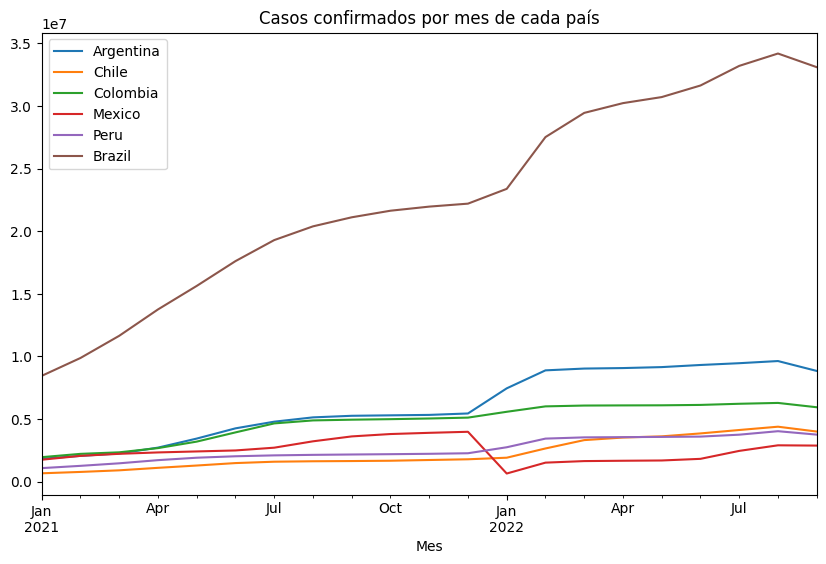

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel("Mes")
plt.show()

Se destaca la cifras altas de Brazil las cuales generalmente tiene tendencia al crecimiento respecto a los otros países, podria ser muestra de la ineficiencia de sus politicas de salubridad y factor comportamental de la población, le sigue Argentina sin un aumento tan considerable pero a su vez marcado respecto a los demás paises;  México por su parte muesta los mejores resultados. 

Recuperaciones de casos por mes de cada país

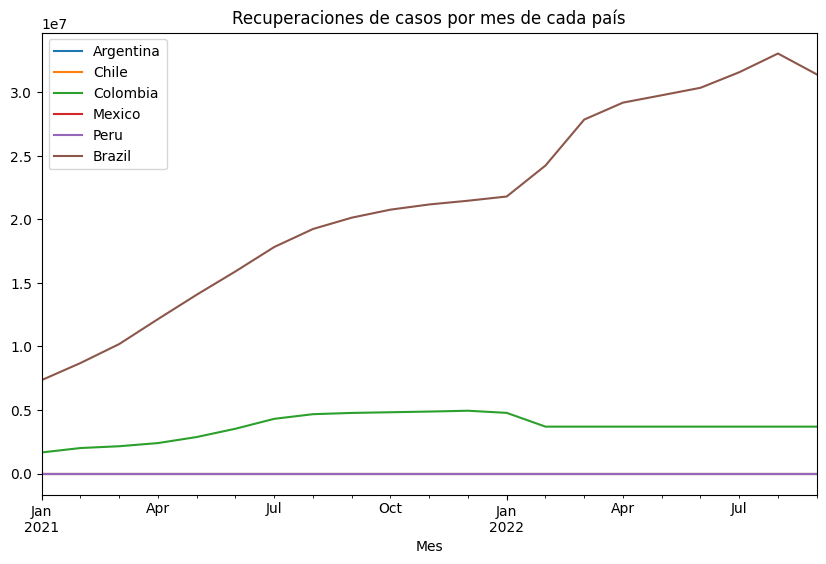

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel("Mes")
plt.show()

En el caso de Brazil, a pesar de las cifras en aumento que anteriormente se mostraron respecto a muertes y casos confirmados se puede ver un alza en la recuperación lo que influye en el descenso de las muertes,en el caso de Colombia se presento un leve aumento para luego mostrar estabilidad. Se destaca la estabilidad de Perú sin notarse aumentos lo cual puede deberse a factores de reducción en numero de casos nuevos, aumentos en el tiempo de recuperación y hasta cambios en la metodología del reporte. 

Comparación del Número de Casos Nuevos entre Países

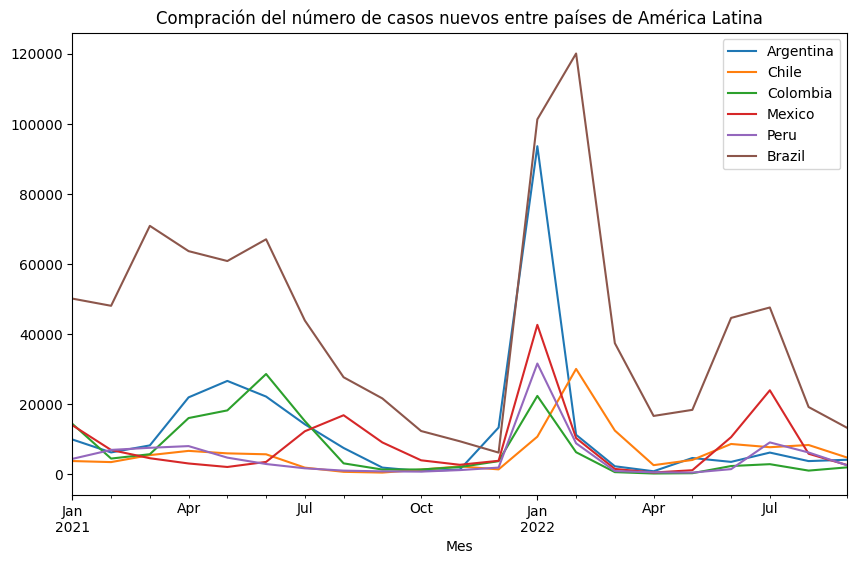

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Compración del número de casos nuevos entre países de América Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.xlabel("Mes")
plt.show()

Se destaca el repunte de todos los paises finalizando el año 2021 este factor puede deberse a las fiestas de fin de año  que incluyen vacaciones y viajes, en esta tendencia se destaca Brazil y Argentina lo cual podria deberse a su alta polbación respecto a otros paises, luego de este repunte, se nota un descenso con estabilidad para algunos paises menos para México y Brazil. 

Dosis acumuladas por país

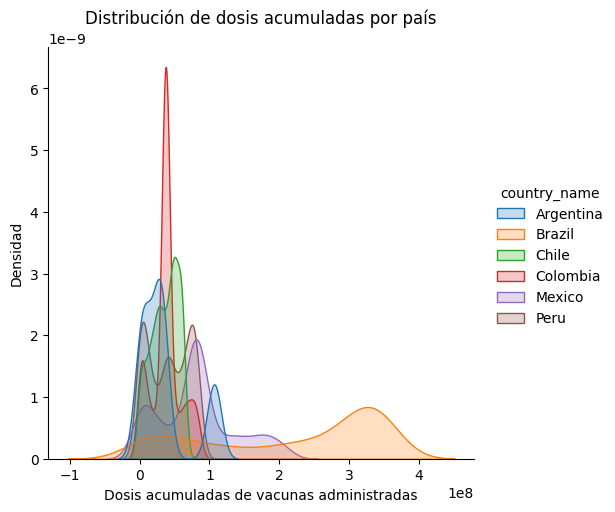

In [ ]:
sns.displot(data_latinoamerica_paises,x="cumulative_vaccine_doses_administered", hue="country_name",kind="kde",fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.xlabel("Dosis acumuladas de vacunas administradas")
plt.ylabel("Densidad")
plt.show()

Se confirma el repunte de Colombia respecto a los otros países, concentrada principalmente en las primeras dosis, dando a entender que la mayoría de la población de este país cuenta con la primera, también se destaca la estabilidad de Brazil y como se nota su aumento a partir de las dos dosis administradas, pero no es alto respecto a la densidad poblacional lo que quiere decir que hay pocas personas vacunadas y esto se contrasta con las anteriores cifras demostradas donde este país se destaca respecto a los otros. 

Boxplot de temperatura media de cada país

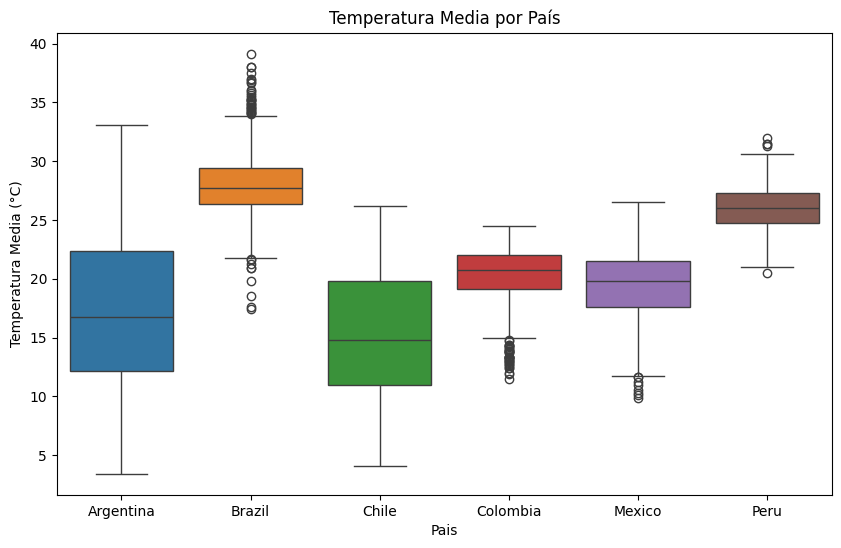

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises,hue='country_name')
plt.title('Temperatura Media por País')
plt.xlabel("Pais")
plt.ylabel("Temperatura Media (°C)")
plt.show()

Se puede observar una mayor variabilidad de la temperatura en los paises de Argentina y Chile, teniendo en cuenta el tamaño de sus cajas, en cuanto a valores atípicos se destacan Brazil, Colombia, México y Perú indicando presencia de valores extremos o inusuales en el conjunto de datos, afectando la calidad de los mismos. Volviendo al tema de la temperatura podria incidir en los efectos de transmisión debido a que los cambios bruscos afectan el sistema inmunológico haciendolo que este sea mas suceptible a infecciones. 

Violinplot de las variables que “Sí” tenga cambios de valores. Para estre proceso se crea un Dataframe con las columnas mayores a 6 debido a que poseen valores diferentes para cada país

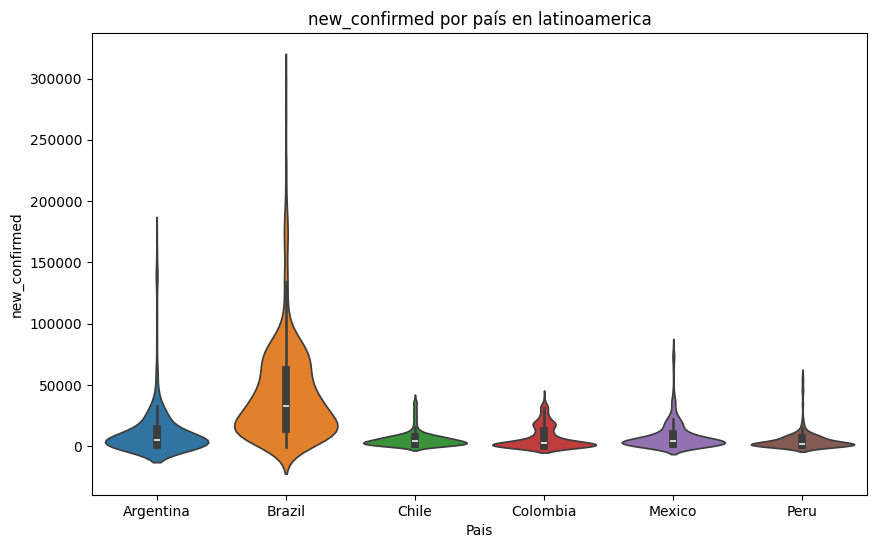

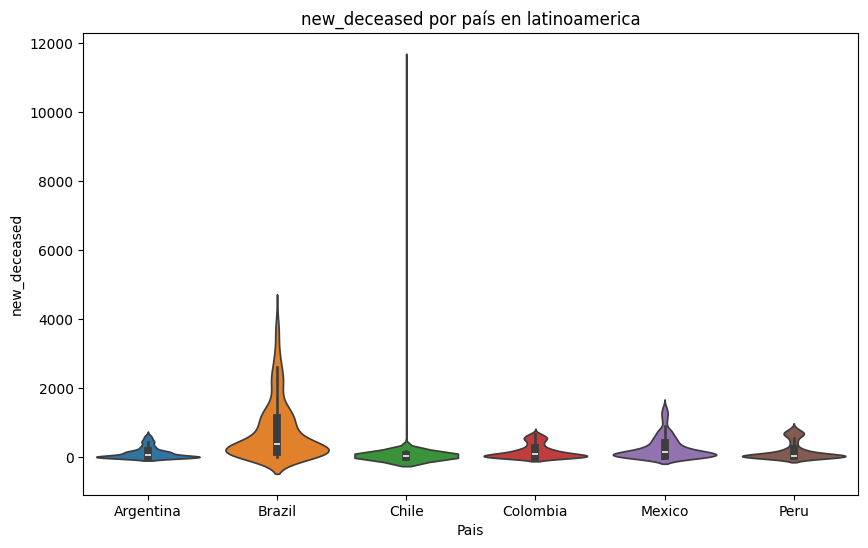

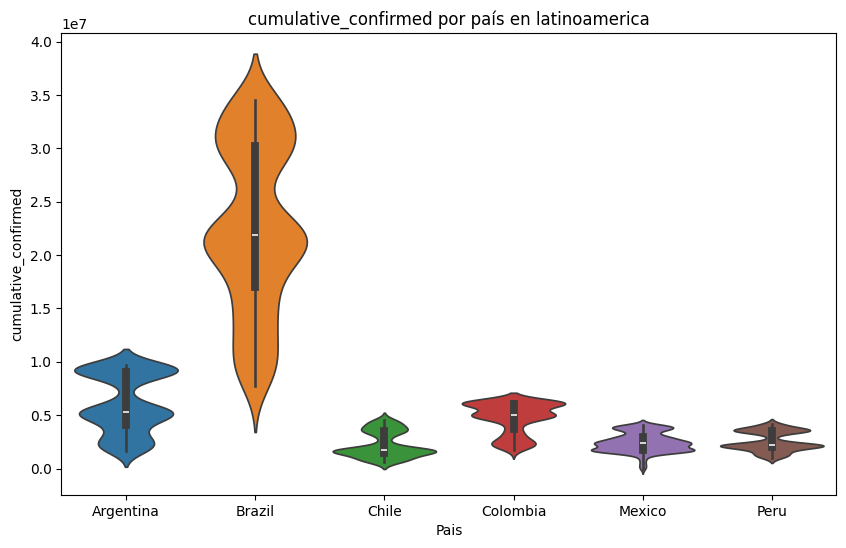

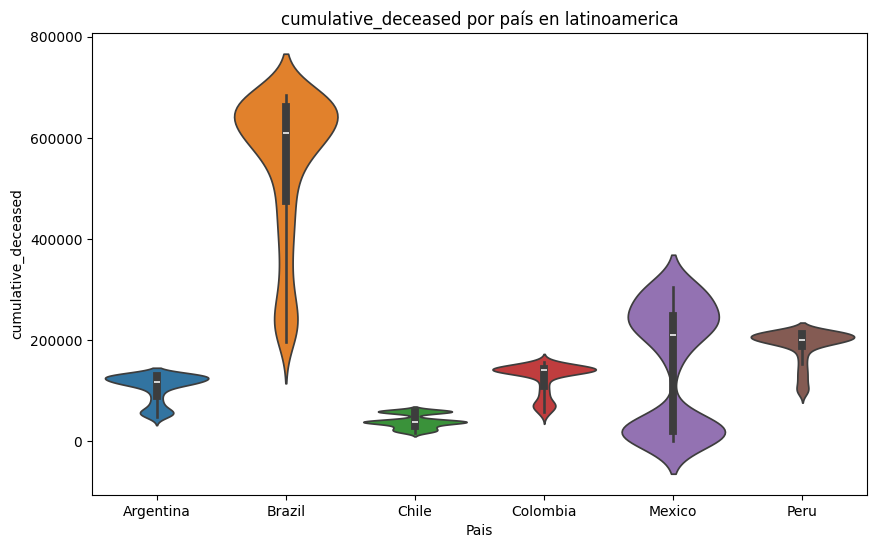

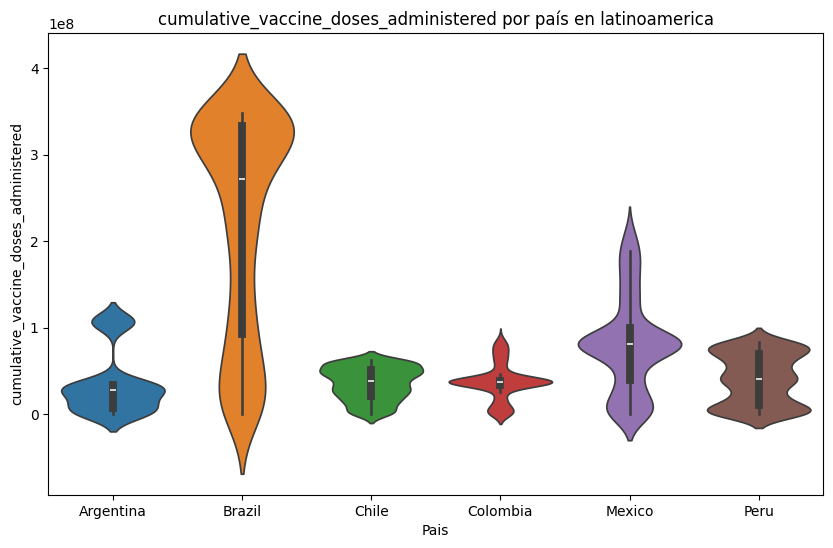

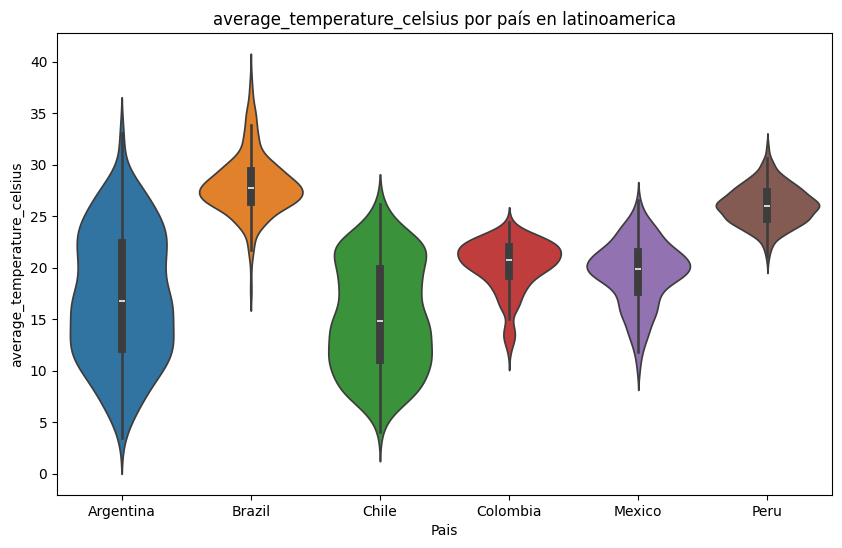

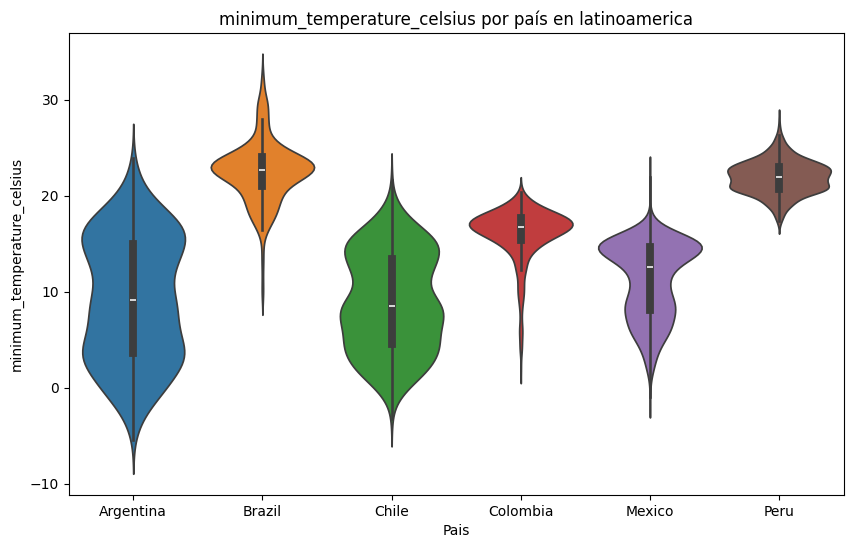

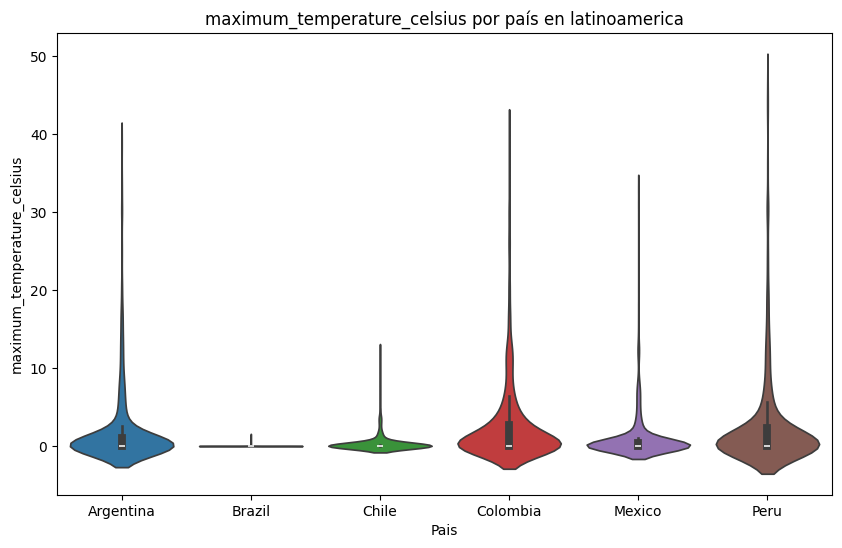

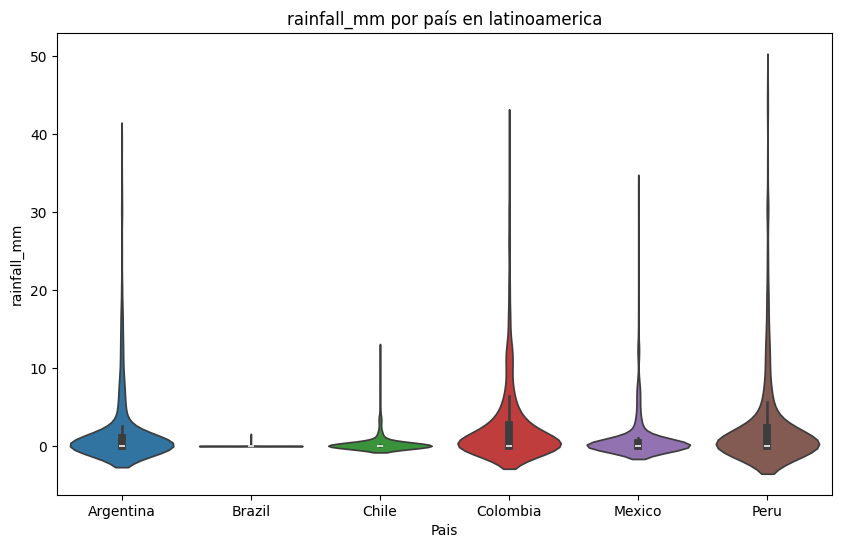

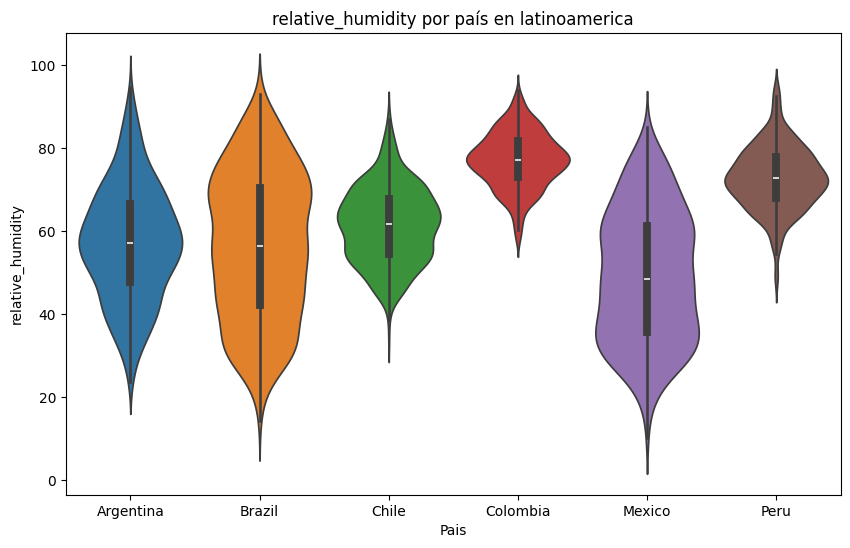

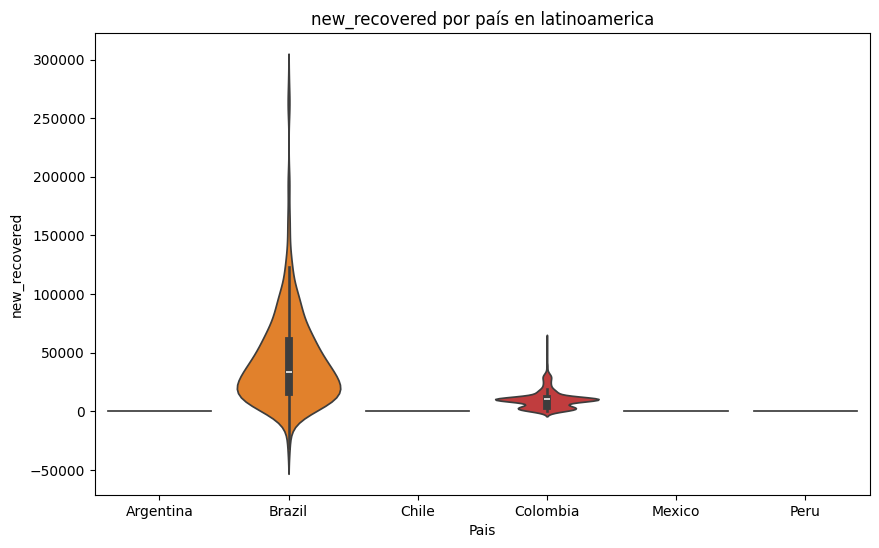

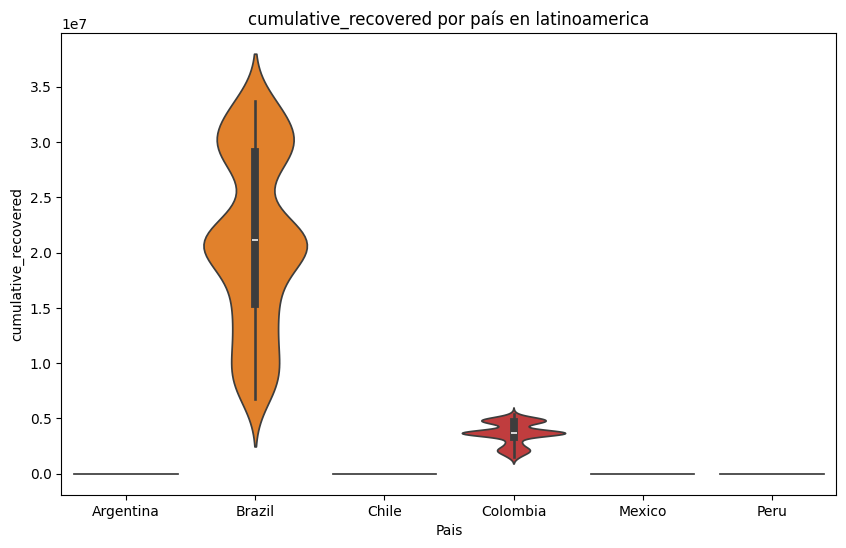

In [ ]:
#Creación del dataframe
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#Se agrega a columnas_mayores_6, la columna "country_name" para poder realizar el análisis por país
columnas_mayores_6.append('country_name')

#Creación de un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

#Generación del Violinplot en todos los paises para las variables numéricas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig,ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.xlabel("Pais")
        plt.show()
        

Se puede observar una alta densidad de datos en Brazil para la mayoria de los gráficos analizados, se puede deber a factores como su alta población respecto a otros paises y la calidad de los datos del dataset suministrado. Teniendo en cuenta el argumento anterior respecto a la densidad de los datos se obtuvieron las siguientes conclusiones: 

* Acumulado de dosis de vacunas adminsitradas: se destacaron teniendo en cuenta el acho del violin los paises de Brazil, Mexico y Perú. 
* Casos confirmados: Brazil se destaca respecto a los otros países, como se ha expresado con anterioridad el factor poblacional incide en las cifras. 
* Muertes: Brazil y Mexico presentaron los violes mas anchos respectos a los otros páises. 


Distribución de la población por grupos de edad; para poder realizar este gráfico creamos una columna de edades

In [ ]:
age_columns = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']

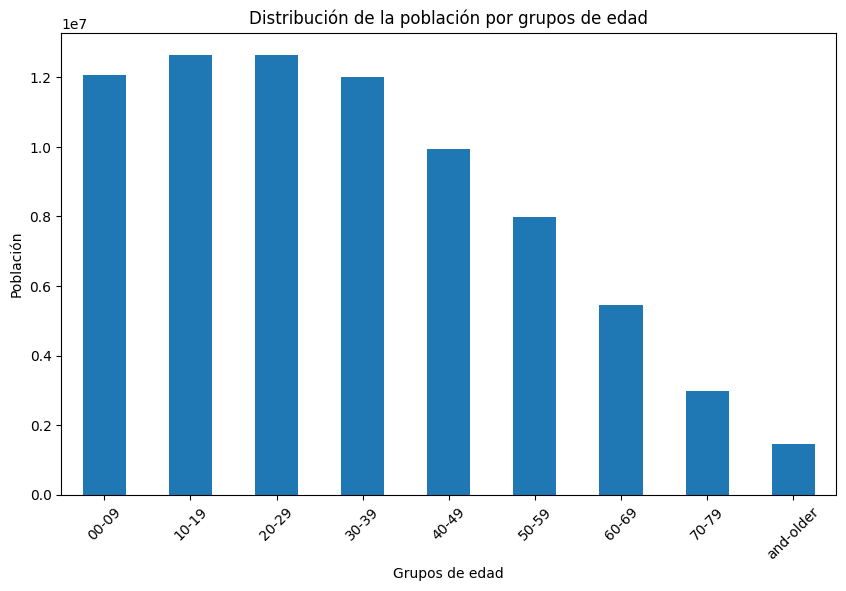

In [ ]:
#Cálculo de la distribución de la población por grupos de edad
age_distribution = data_latinoamerica_paises[age_columns].mean()

plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('Grupos de edad')
plt.ylabel('Población')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns],rotation=45)
plt.show()

Se puede observar que los grupos de los 10 a los 29 años presentan las cifras mas altas, teniendo en cuenta que este grupo de edad no es la población de alto riesgo, el factor de la edad no sería un alto incidente en las muertes por cual se puede entrar a analizar factores como la contaminación del aire, enfermedades persistentes y la prevalencia del tabaquismo que a grandes rasgos en este grupo de edad puede ser de alta incidencia. 

Vacunaciones por mes de cada país

Total vacunados en grupo de edad 00_19: 87226283429
Total vacunados en grupo de edad 20_39: 89166393274
Total vacunados en grupo de edad 40_59: 65878458125
Total vacunados en grupo de edad 60_79: 31344750087
Total vacunados en grupo de edad 80_and_older: 5440366010


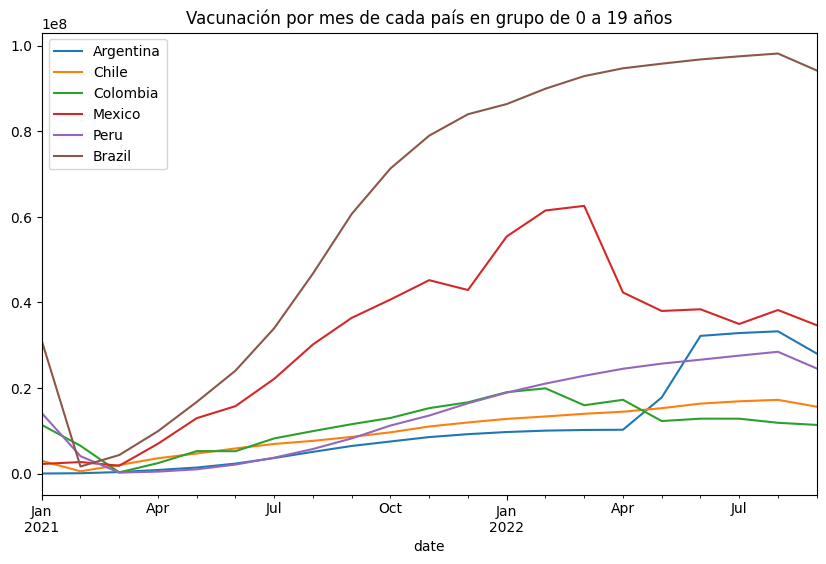

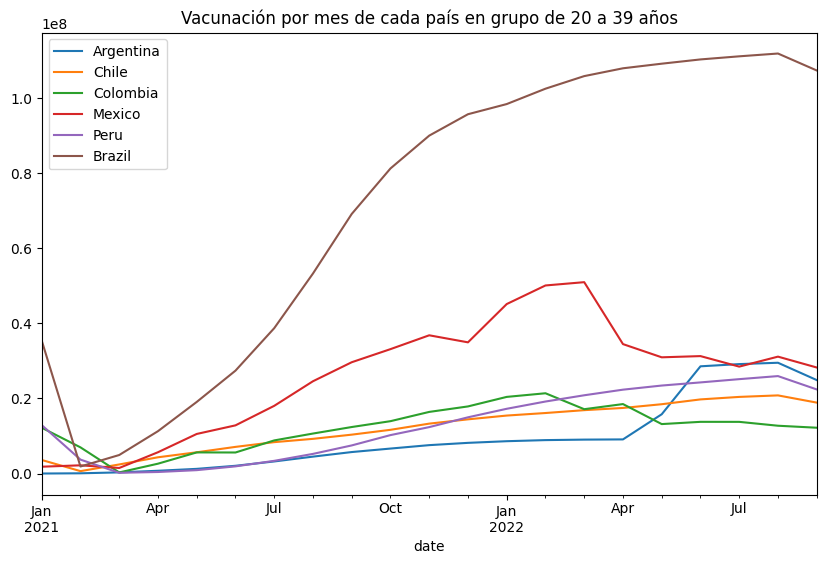

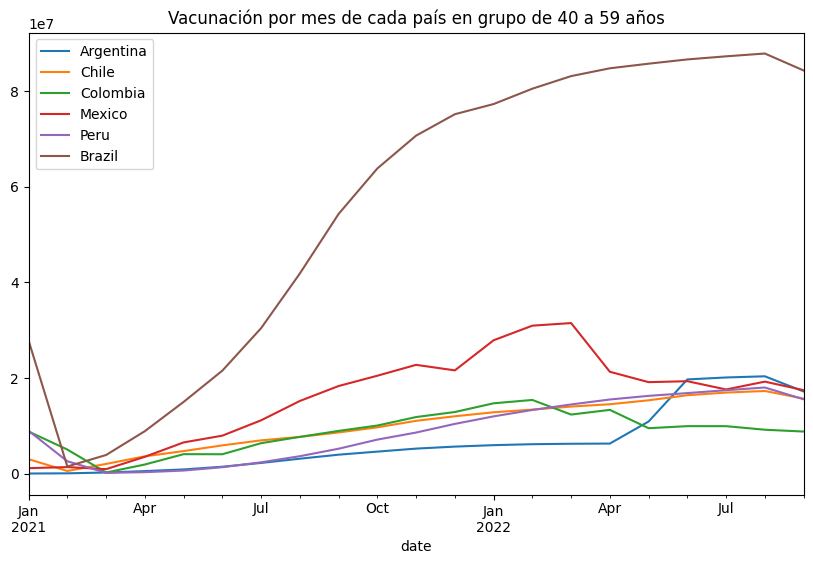

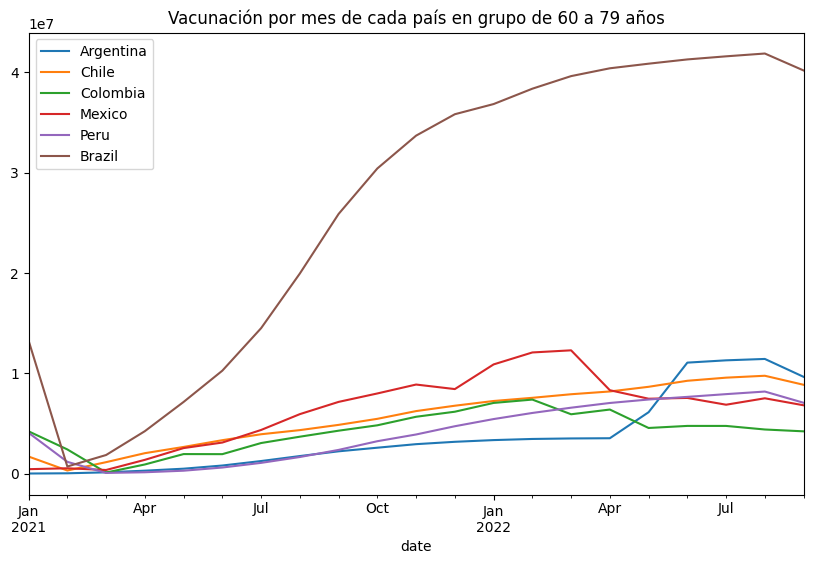

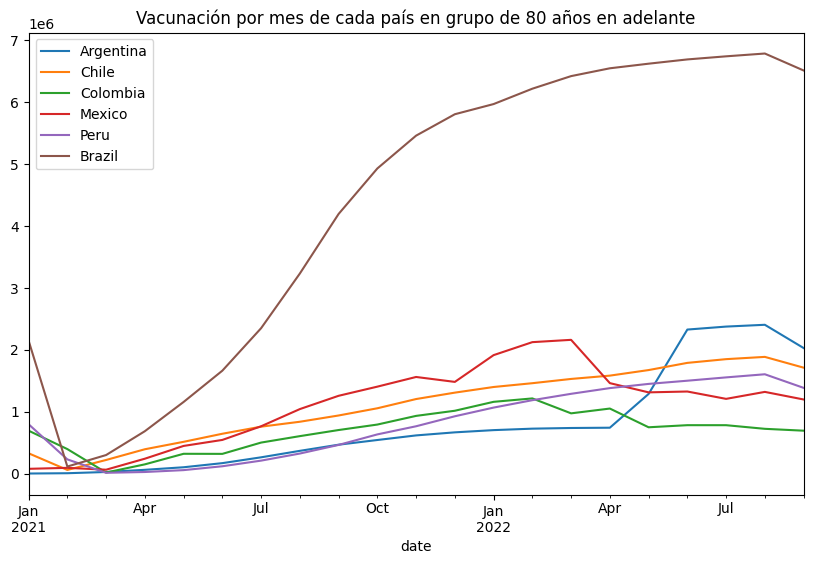

In [ ]:
# Cálculo de grupos de edad
data_latinoamerica_paises['population_age_00_19'] = data_latinoamerica_paises['population_age_00_09'] + data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39'] = data_latinoamerica_paises['population_age_20_29'] + data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59'] = data_latinoamerica_paises['population_age_40_49'] + data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79'] = data_latinoamerica_paises['population_age_60_69'] + data_latinoamerica_paises['population_age_70_79']

# Cálculo de vacunados por grupo de edad
age_groups = ['00_19', '20_39', '40_59', '60_79', '80_and_older']
for group in age_groups:
    data_latinoamerica_paises[f'population_age_{group}_vacunados'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] * data_latinoamerica_paises[f'population_age_{group}'] / data_latinoamerica_paises['population']

# Limpieza y conversión de datos
vacunados_columns = [f'population_age_{group}_vacunados' for group in age_groups]
data_latinoamerica_paises[vacunados_columns] = data_latinoamerica_paises[vacunados_columns].fillna(0).astype(int)

# Suma de vacunados por grupo de edad
for group in age_groups:
    total_vacunados = data_latinoamerica_paises[f'population_age_{group}_vacunados'].sum()
    print(f'Total vacunados en grupo de edad {group}: {total_vacunados}')

#Generación de las gráficas

fig,ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig,ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 80 años en adelante')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

A nivel general, se puede observar que los grupos de edades mas vulnerables (60-79 y 80 años en adelante) son los presentan las cifras mas bajas de vacunación factor que puede incidir directamente en las cifras de mortalidad por el virus; cabe aclarar que esta baja cifra incide en la baja población de estos grupos de edad que se demostró en la gráfica anterior.

Respecto a los países, Brazil marca una tendencia alta respecto a los otros países, así mismo las variaciones entre grupos no son marcadas, se puede observar que Colombia tienen las cifras de vacunación mas bajas en todos los grupos de edad respecto a los demás países, lo que aumenta las probabilidades de contagio y agravamiento de los sintomas en todos los grupos de edad. 

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

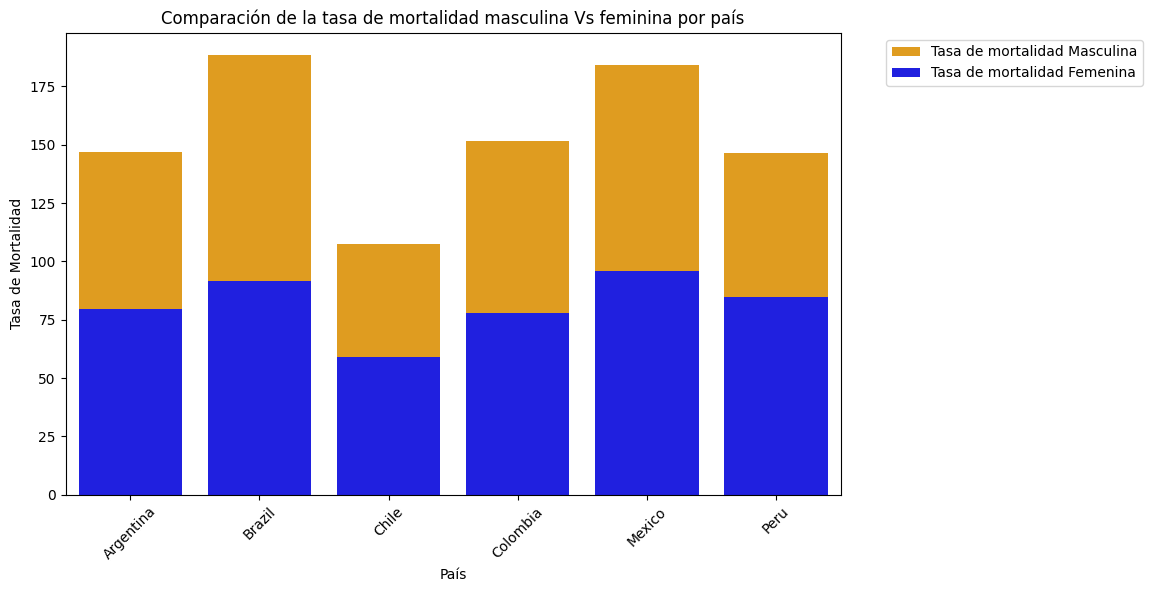

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x='country_name',y='adult_male_mortality_rate',color='orange', label='Tasa de mortalidad Masculina')
sns.barplot(data=data_latinoamerica_paises, x='country_name',y='adult_female_mortality_rate',color='blue', label='Tasa de mortalidad Femenina')
plt.xticks(rotation=45)
plt.ylabel('Tasa de Mortalidad')
plt.xlabel('País')
plt.title('Comparación de la tasa de mortalidad masculina Vs feminina por país')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

Se destacan Chile y Perú con las cifras mas bajas, a grandes rasgos la mortalidad tando de hombres como mujeres no muestra un cambio relevante en los paises analizados, las cifras altas de México y Brazil se deben a su alta población respecto a otros paises

Matriz de correlación de indicadores demográficos y de salud

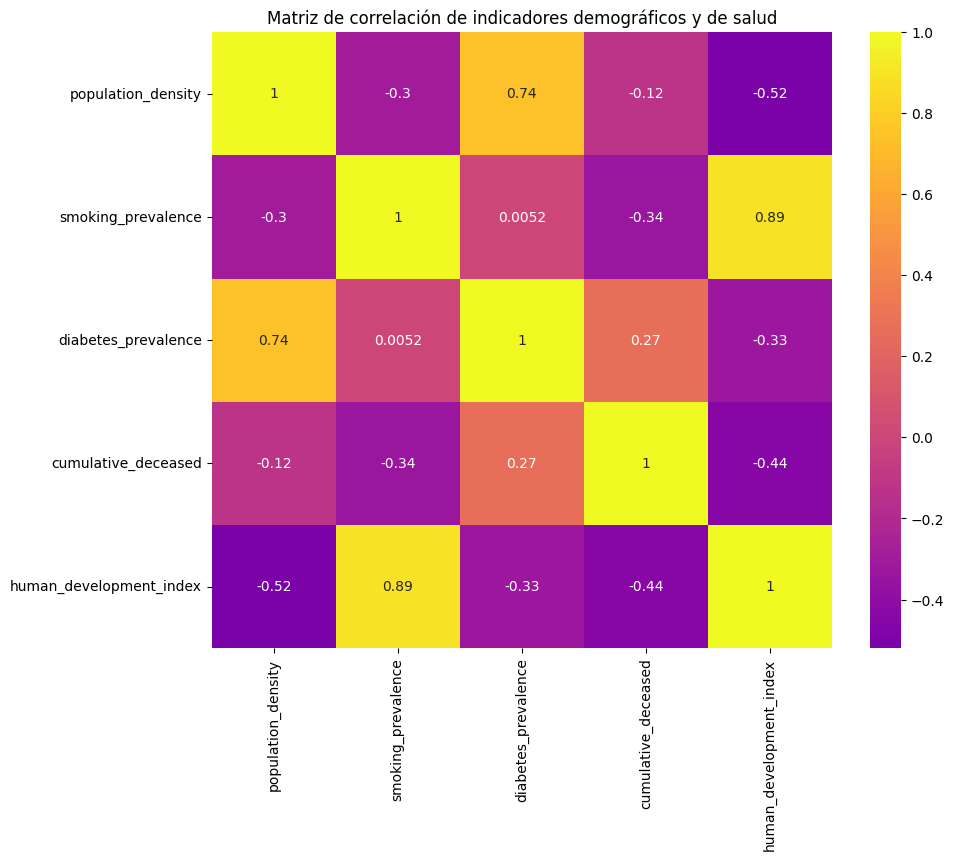

In [ ]:
#Selección de un subconjunto de columnas para el análisis de corelación
colums=['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
correlation_matrix = data_latinoamerica_paises[colums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='plasma',center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

Se puede observar una alta relacion entre la diabetes y la densidad poblacional, la cual es  logica por ser variables proporcionales, como se ha expresado con anterioridad, la diabetes incide en mayor riesgo de hospitalización,ingreso a la UCI y requerir ventilación mecánica, condiciones que impactan directamente en las cifras de muertes por el virus; estos argumentos anteriores validan la correlacion de 0,27 de prevalencia de diabetes con fallecidos acumulados. 
Según fuentes consultadas, a pesar de que no es una relacion simple, la relacion entre la prevalencia del tabaquismo y el indice de desarrollo humano, sugiere que si se tienen cifras bajas del mismo, son paises que suelen tener sistemas de salud pública más débiles, menor acceso a educación y menos recursos para campañas de concienciación lo que infiere en la proliferación de su consumo. 

Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad

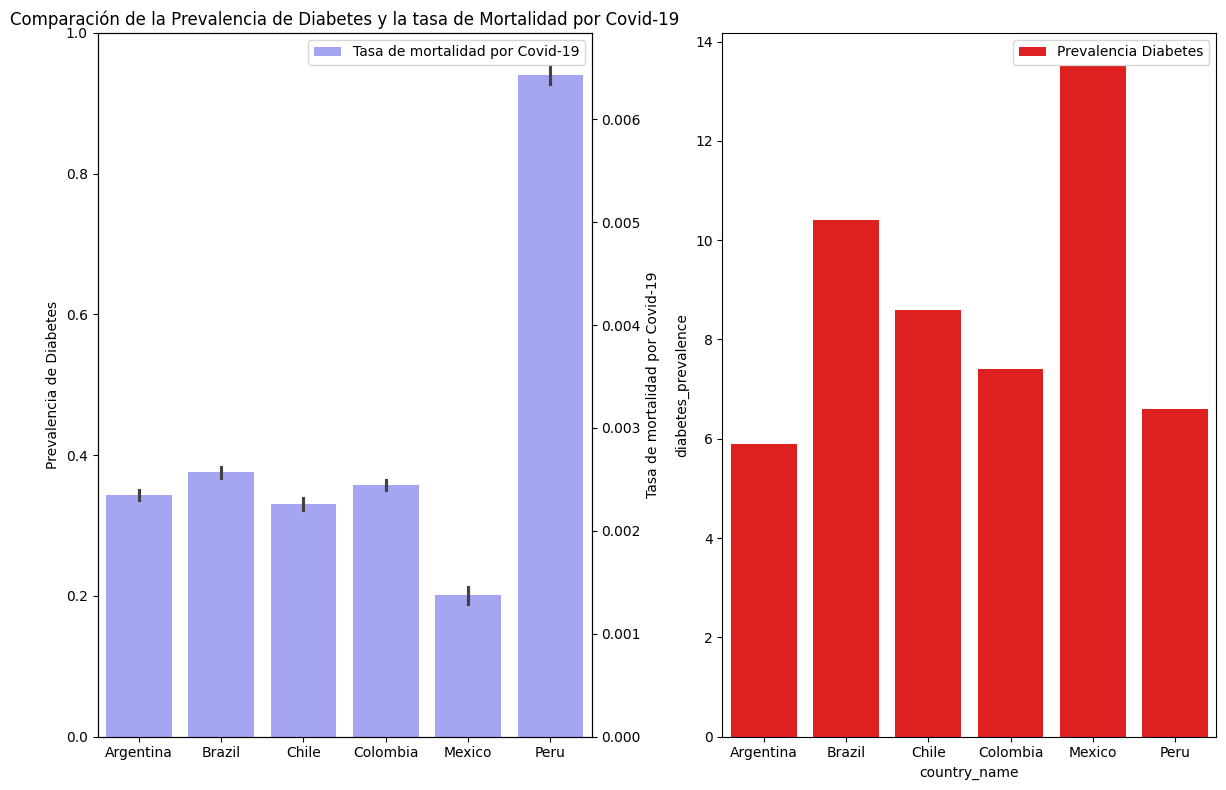

In [ ]:
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises,x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['diabetes_prevalence'],color=('red'),label='Prevalencia Diabetes')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],color='blue',label='Tasa de mortalidad por Covid-19',ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de mortalidad por Covid-19')
plt.title('Comparación de la Prevalencia de Diabetes y la tasa de Mortalidad por Covid-19')
plt.tight_layout()
plt.show()

Aunque anteriormente se argumentó la alta incidencia de la diabetes en la mortalidad, estas cifras no demuestran una relación entre los países, lo que incide en las políticas de salud pública que están implementando, por ejemplo México presenta altas cifras de prevalencia en diabetes pero bajas en la tasa de mortalidad del covid, lo que implica que no hay relación, por que factores como la prevención, la vacunación y los sistemas de salud inciden en las cifras de fallecidos por el virus. 

### Avance 3

Evolución de Casos Activos vs. Recuperados

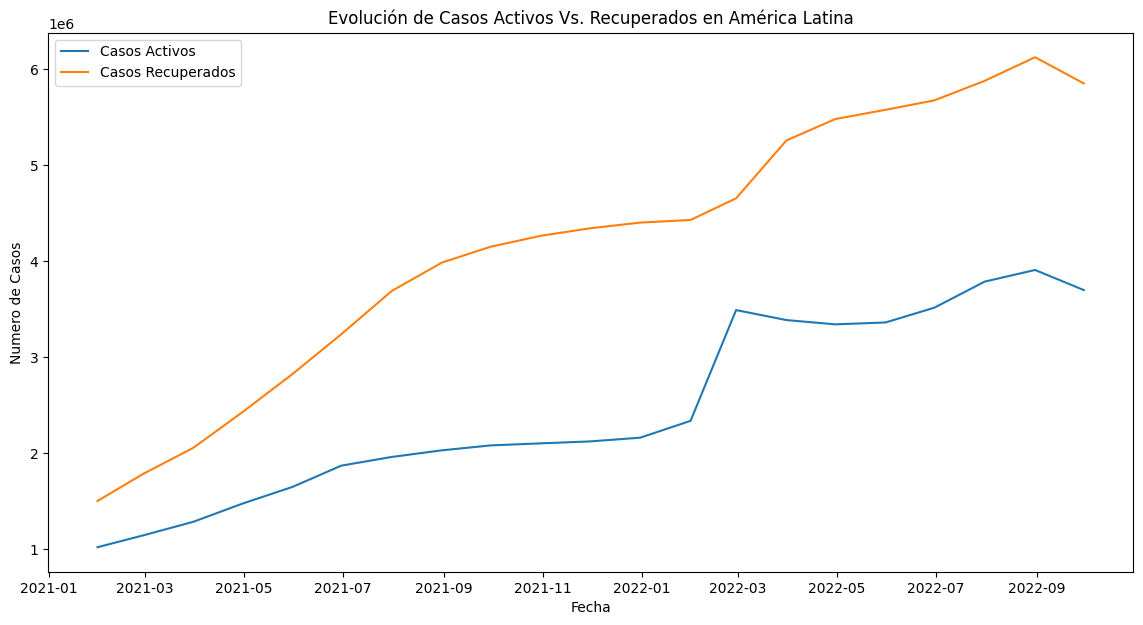

In [ ]:
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True),x='date', y='active_cases',label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')
plt.title('Evolución de Casos Activos Vs. Recuperados en América Latina')
plt.legend()
plt.show()

Se puede observar como los casos recuperados muestran en general una tendencia a crecer respecto a los activos lo cual podria influir en el cubrimiento de los servcios de salud. Así mismo se destaca un aumento en los casos activos para el mes de febrero del año 2022 lo cual podria coincidir con las celebraciones de fin de año donde las personas optan por viajar y reunirse con todos sus familiares.   

Tasa de letaldiad por País

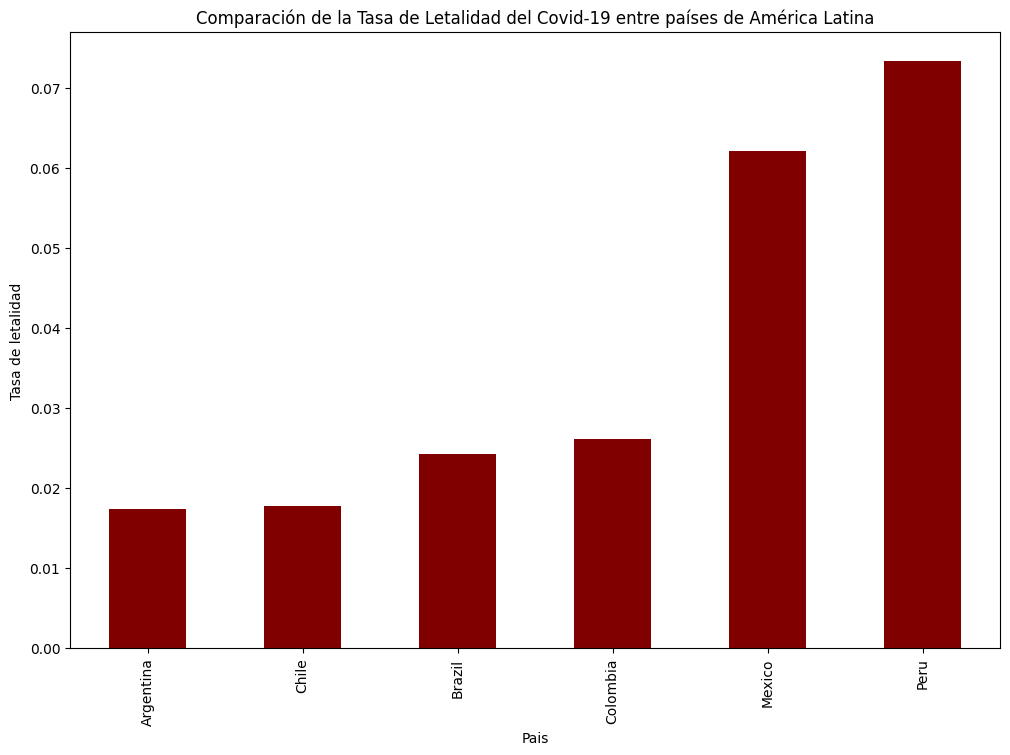

In [ ]:
#Calculo de la tasa de letalidad por País 
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

#Creación del gráfico de barras 
plt.figure(figsize=(12,8))
bars = fatality_rates.plot(kind='bar',color='maroon')

#Configuración de los ejes y el título del gráfico
plt.xlabel('Pais')
plt.ylabel('Tasa de letalidad')
plt.title('Comparación de la Tasa de Letalidad del Covid-19 entre países de América Latina')
plt.show()

Se puede obsevar una letalidad alta en los paises de México y Perú respecto a los demas paises, para el caso de Perú segun la información analizada con anterioridad tambien muestra cifras altas de polucion en el aire, condiciones que permiten la propagación del virus a traves de las partículas contaminantes, tambien las cifras bajas de vacunación que se muestran en este país inciden en las elevadas cifras. 

Relación entre la Cobertura de Vacunación y la Reducción de Casos

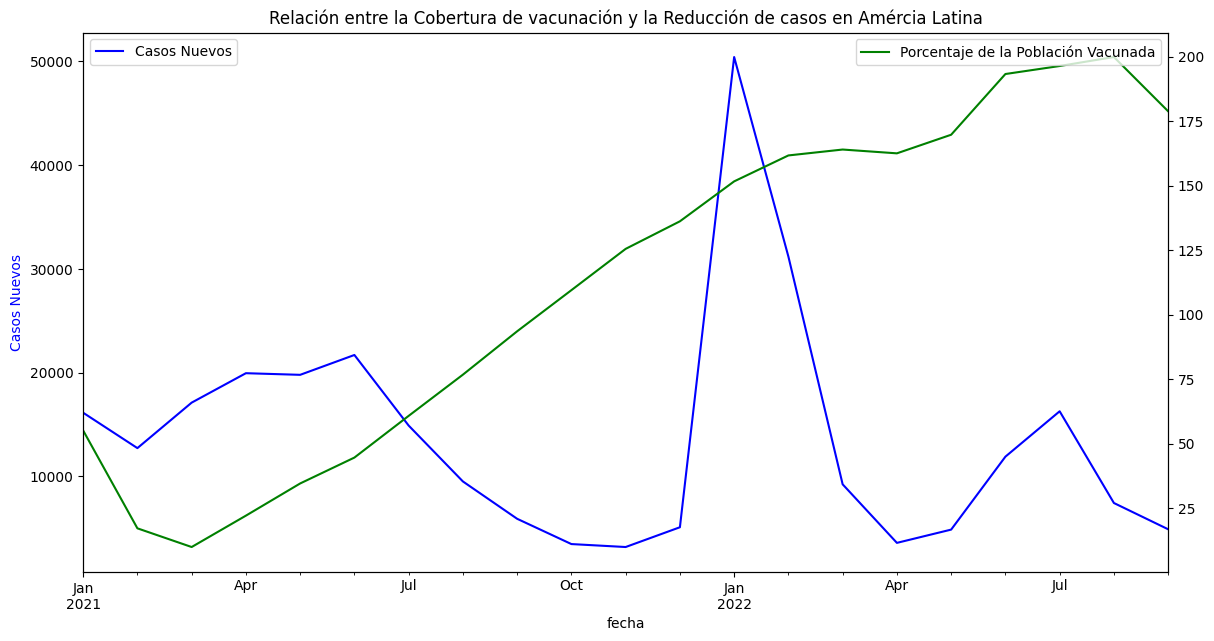

In [ ]:
#Evolución de la vacunación en América Latina y la reduccion de casos de Covid-19
plt.figure(figsize=(14,7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#Creación de porcentajes de vacunación
data_latinoamerica_paises['percentage_vaccinated'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'])*100
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2,color='green', label='Porcentaje de la Población Vacunada')

#Grafico 
ax1.set_xlabel('fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_title('Relación entre la Cobertura de vacunación y la Reducción de casos en Amércia Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se puede observar cómo la población vacunada todavia no afecta el crecimiento de los casos confirmados, lo cual puede demostrar que las personas no están tomando las medidas necesarias para evitar el contagio del virus, los picos altos en los meses de enero y julio que por lo general son épocas de vacaciones confirman la alta propagación del virus. Se puede observar una tendencia al alza en las vacunas lo cual incidió que el segundo pico que más predomina en la gráfica fuera más bajo, debido a que las personas vacunadas tienen menor carga viral que las que no lo están. 

Progreso de la vacunación por país

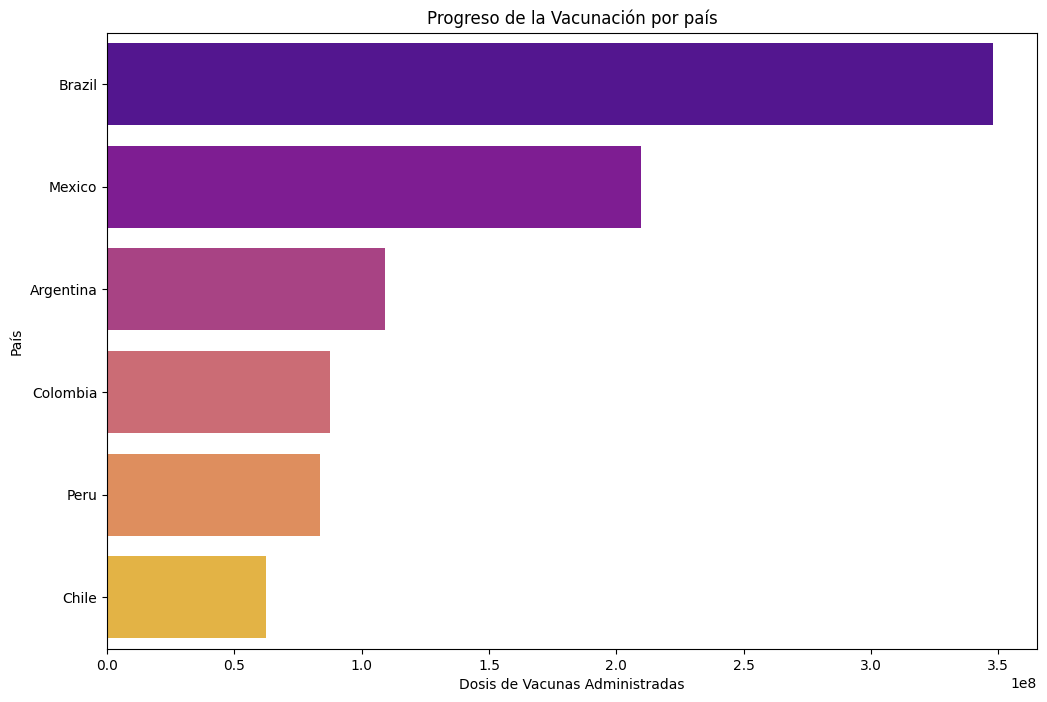

In [ ]:
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index,hue=vaccination_data.index, palette='plasma')
plt.xlabel('Dosis de Vacunas Administradas')
plt.ylabel('País')
plt.title('Progreso de la Vacunación por país')
plt.show()


Se puede observar el repunte de Brazil y México, cabe mencionar que la población de estos dos países es mayor respecto a los otros por lo cual presenta cifras elevadas. Cabe destacar la baja cifra de Perú en las dosis administradas lo que incidió en las altas cifras de mortalidad presentadas en este análisis con anterioridad, Chile a pesar de no tener unas cifras de mortalidad tan altas, si las tiene en la prevalencia de tabaquismo condicion que empeora los síntomas de la enfermedad por lo cual puede incidir en las cifras de contagiados y muertes. 

Nuevos casos y temperatura promedio

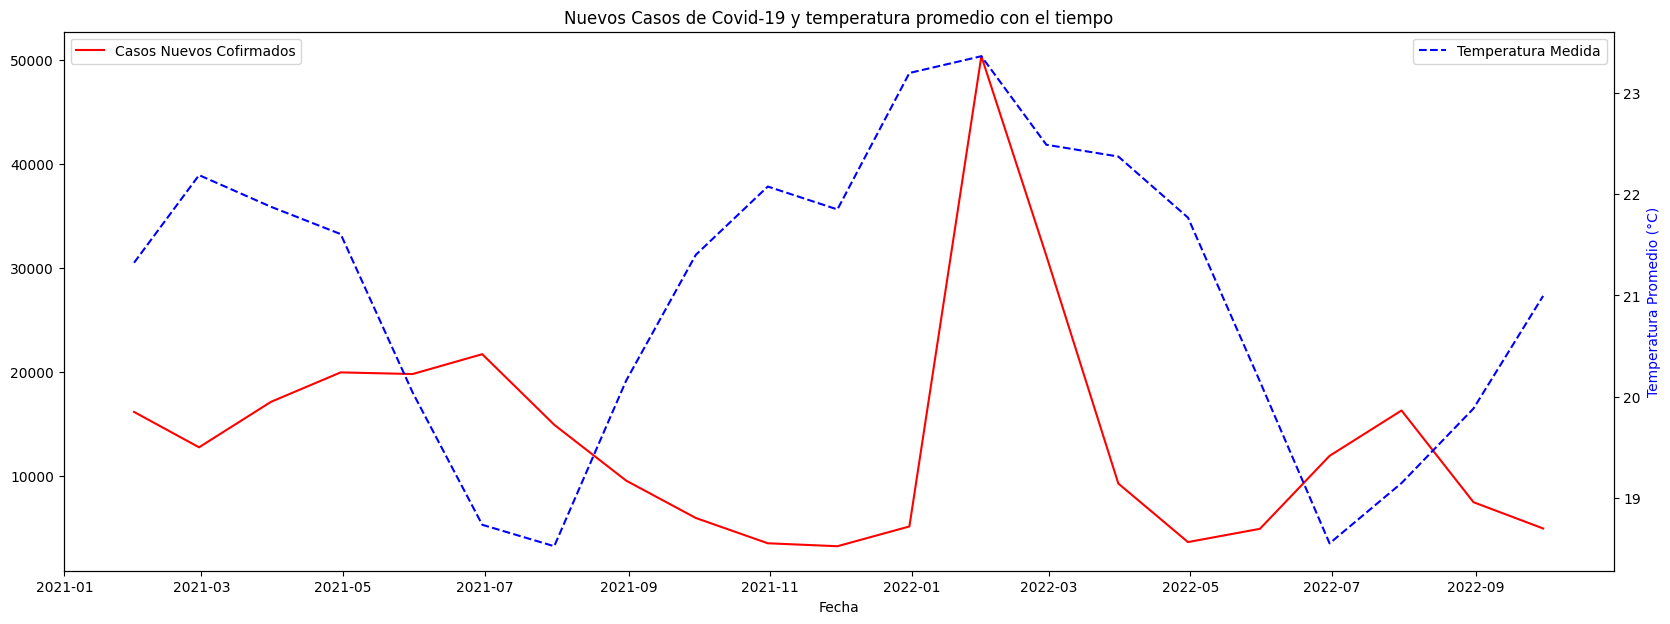

In [ ]:
plt.figure(figsize=(20,7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index,data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'],color='red',label='Casos Nuevos Cofirmados')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index,data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],color='blue',label='Temperatura Medida',linestyle='--')

ax1.set_xlabel('Fecha')
ax2.set_ylabel('Nuevos Casos Confirmados', color='red')
ax2.set_ylabel('Temperatura Promedio (°C)',color='blue')
plt.title('Nuevos Casos de Covid-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se pueden ver relaciones inversas entre la temperatura y casos confirmados, se puden observar dos repuntes en los meses de julio de los años 2021 y 2022 en donde un descenso de la tempertura aumenta la cifra de los casos, a la vez esta relación también podria desvirtuase si se observa el pico mas alto de los nuevos confirmados donde la temperatura es alta, por lo cual se puede concluir que la temperatura no incide en el aumento o disminución de los contagios. 

Impacto de la Urbanización en la Propagación del Covid-19

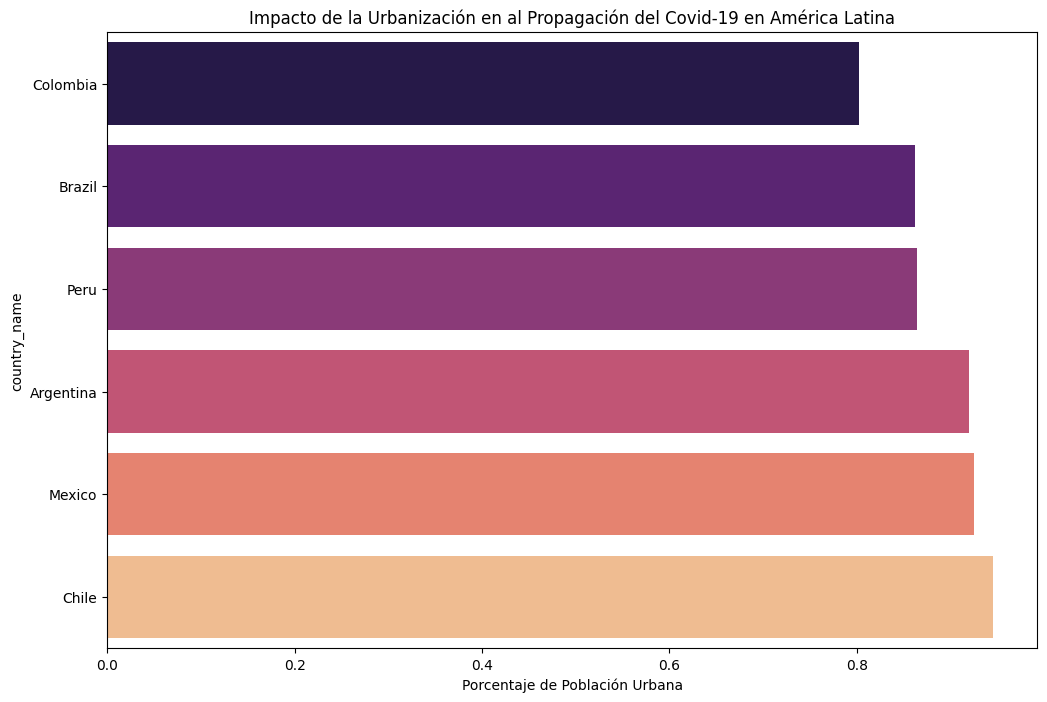

In [ ]:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12,8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, hue=urban_cases.index, palette='magma', legend=False)
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en al Propagación del Covid-19 en América Latina')
plt.show()



Se puede observar una diferencia minima en los 3 primeros países, se descarta el tema poblacional por que Brazil posee en este caso cifras bajas de poblacion urbana. Por lo cual se puede incidir que la propagación va mas ligada a las políticas de salud pública que gestionan los gobiernos y como sus ciudadanos toman las medidas básicas de prevención para evitar la propagación del virus. 

Evolución semanal y anual de Casos Nuevos

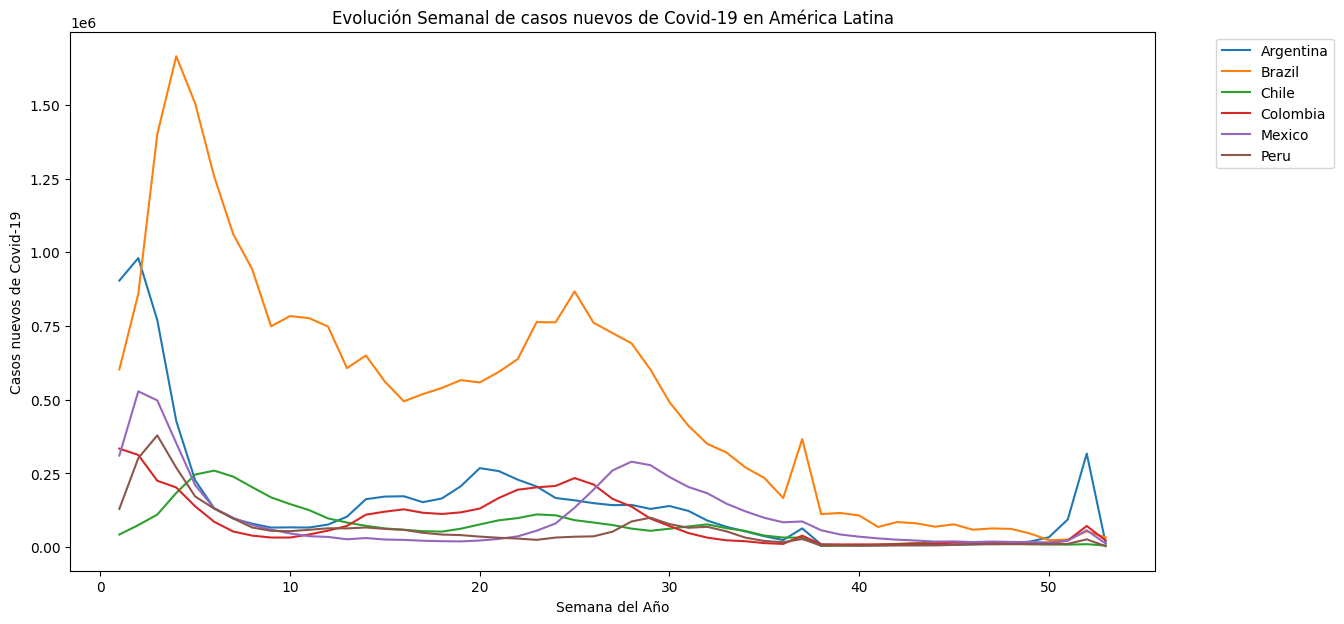

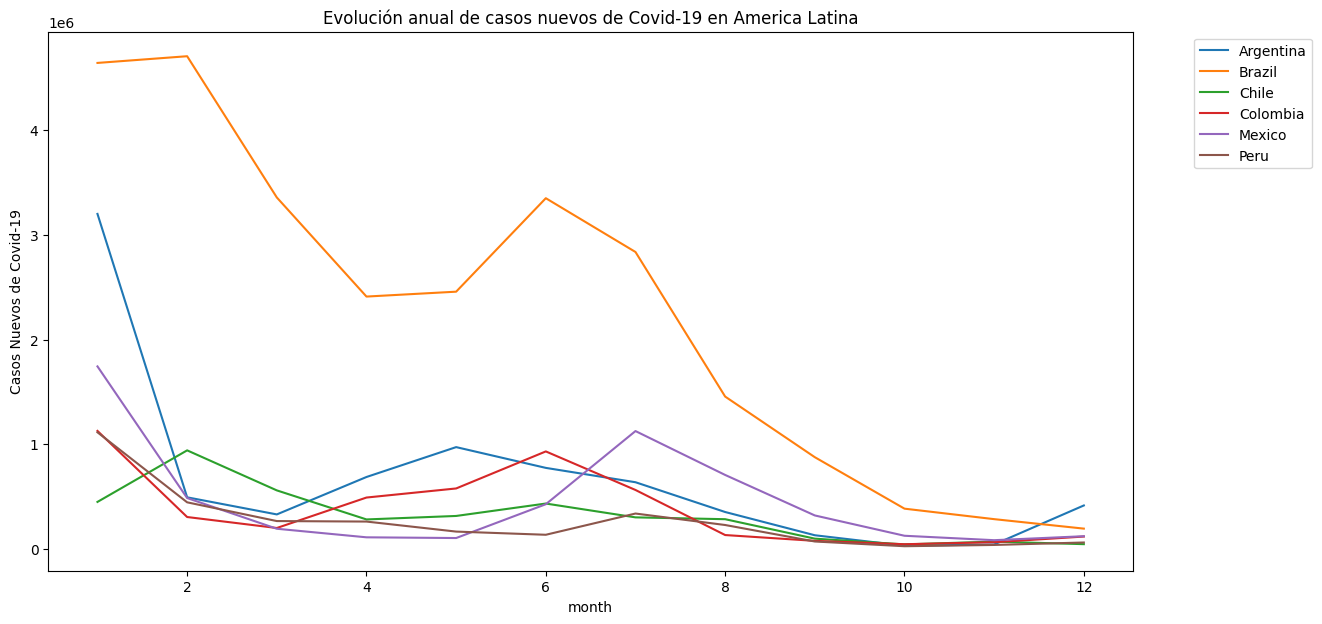

In [ ]:
#Evolución de los casos de Covid-19 en América Latina a lo largo del tiempo por semana
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(['country_name','week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'],country_weekly_cases['new_confirmed'],label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos nuevos de Covid-19')
plt.title('Evolución Semanal de casos nuevos de Covid-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#Evolución de los casos de Covid-19 en América Latina a lo largo del tiempo por año
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name']== country]
    plt.plot(country_yearly_cases['month'],country_yearly_cases['new_confirmed'], label=country)

plt.xlabel('month')
plt.ylabel('Casos Nuevos de Covid-19')
plt.title('Evolución anual de casos nuevos de Covid-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Partiendo de lo general, se puede observar un descenso marcado en todos los paises a excepción de Chile, con picos pronunciados en Argentina, Colombia y México, se confirma al final un descenso paulatino al parecer por efecto de las vacunas administradas, inmunidad de rebaño y las políticas de salud implementadas por los páises. 
Llendo al plano particular se pueden observar los repuntes marcados de Brazil en descenso lo que infiere en una buena gestión por parte del Gobierno local para contener el virus, tambien se puede observar una buena contención de los países sin repuntes tan significativos.  

Distribución de la Población por Edad en Países con altas tasas de mortalidad por Covid-19

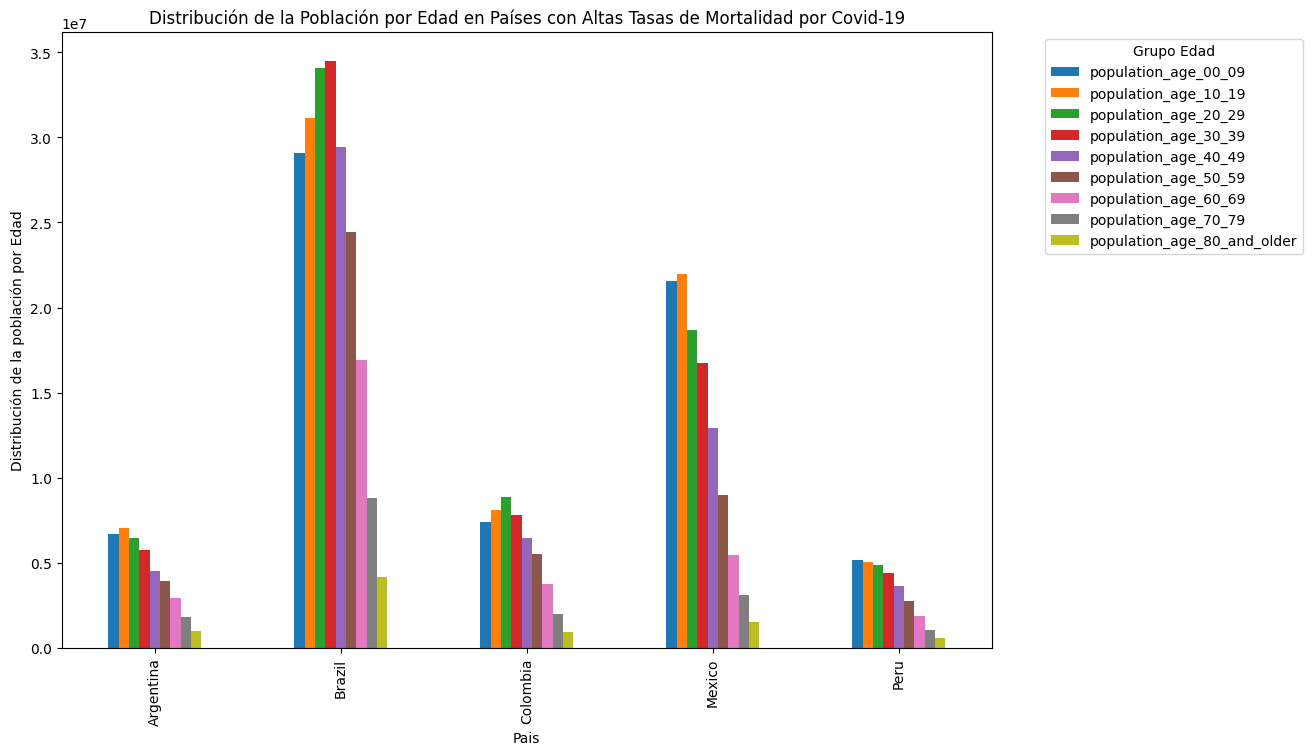

In [ ]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False,figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Distribución de la población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por Covid-19')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='Grupo Edad')
plt.show()

Se puede obsevar variedad en las edades por páises, cabe resaltar el caso de Perú que al tener una población tan baja presente unas tasas de mortalidad tan altas respecto a países como Brazil y México que poseen mucha mas población. A nivel general se puede observar que el grupo de edad mas vulnerable que son los adultos mayores en todos los países es bajo por lo cual el factor de edad no es tan determinante para las cifras de mortalidad del virus. Se confirma la preponderancia de grupos de edades de los 10 a los 29 años, que a nivel general es un grupo poblacional que no tiende a presentar complicaciones con el virus a menos de tener enfermedades de base, por lo cual se deben analizar condiciones ambientales o enfermedades bases que puedan incidir en las cifras. 

Comparación de Estrategias de Vacunación en América Latina

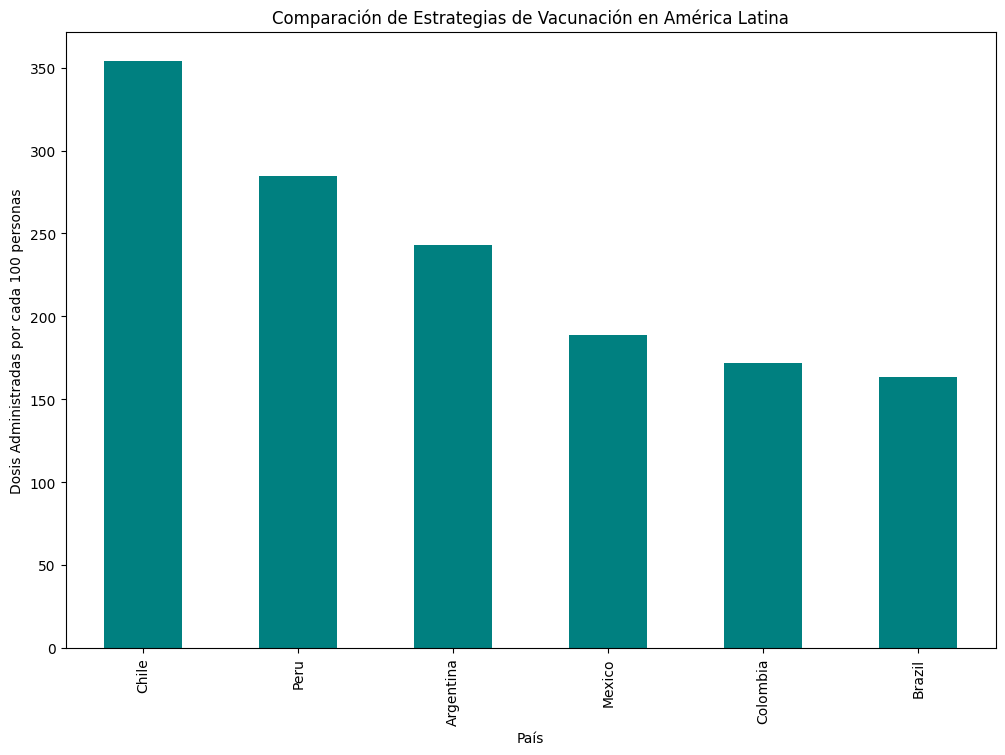

In [ ]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() *100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar',figsize=(12,8),color='teal')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Se destaca el repunte de Perú que al manejar tasas de mortalidad tan altas está implementando acciones contundentes para reducirlas; en el caso de Brazil teniendo en cuenta su alta población sería de suma importancia que implementen medidas más efectivas de distribución de vacunas debido a que el virus se propaga con más facilidad en personas que no están vacunadas.

Evolución del Número de Muertes Diarias

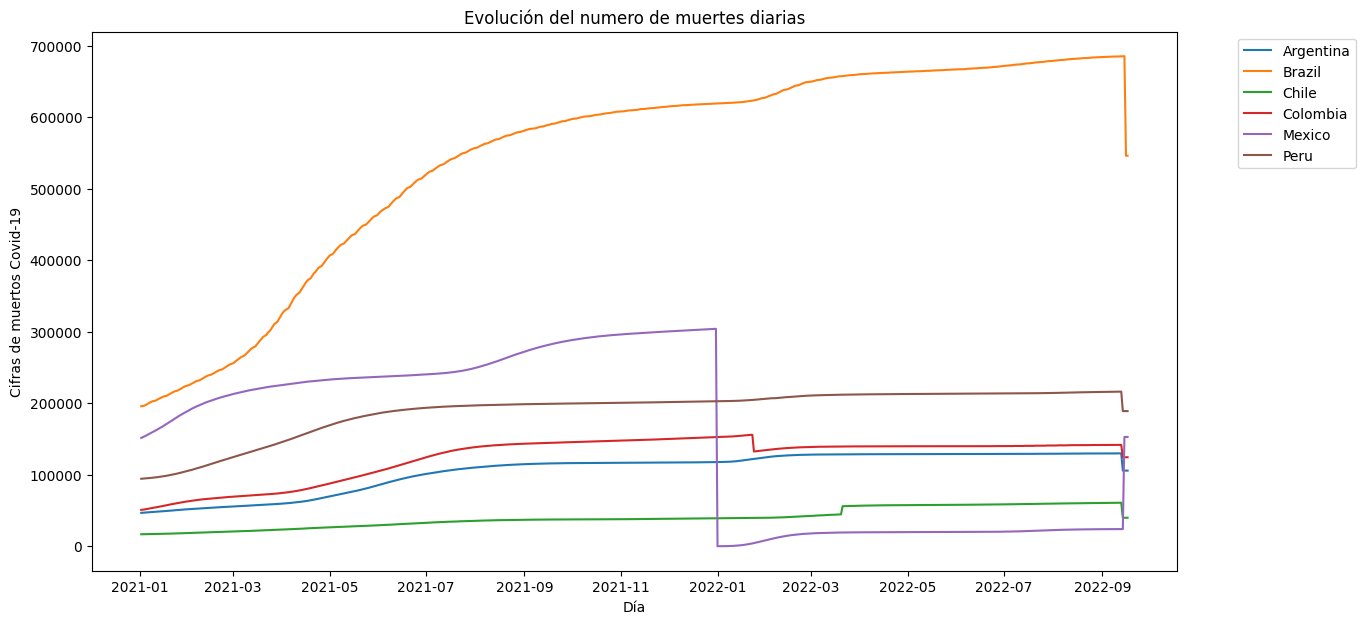

In [ ]:
#Evolución del numero de muertes diarias 
# Crear columnas para el día, mes y año
data_latinoamerica_paises['day'] = data_latinoamerica_paises.index.day
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.year

# Agrupar por país y por día
day_cases = data_latinoamerica_paises.groupby(['country_name', 'year', 'month', 'day'])['cumulative_deceased'].sum().reset_index()

plt.figure(figsize=(14, 7))
for country in day_cases['country_name'].unique():
    country_day_cases = day_cases[day_cases['country_name'] == country].copy()  # Crear una copia explícita
    country_day_cases.loc[:, 'date'] = pd.to_datetime(country_day_cases[['year', 'month', 'day']])
    plt.plot(country_day_cases['date'], country_day_cases['cumulative_deceased'], label=country)

plt.xlabel('Día')
plt.ylabel('Cifras de muertos Covid-19')
plt.title('Evolución del numero de muertes diarias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


A nivel general se puede notar un tendencia estable en la mayoria de los páises, es de destacar el descenso marcado de México en las muertes el cual pasó de un segundo lugar en cifras al último lugar. 

Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

* Se realiza un Group by por país con las muertes acumuladas por el máximo y el minimo

In [ ]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [ ]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

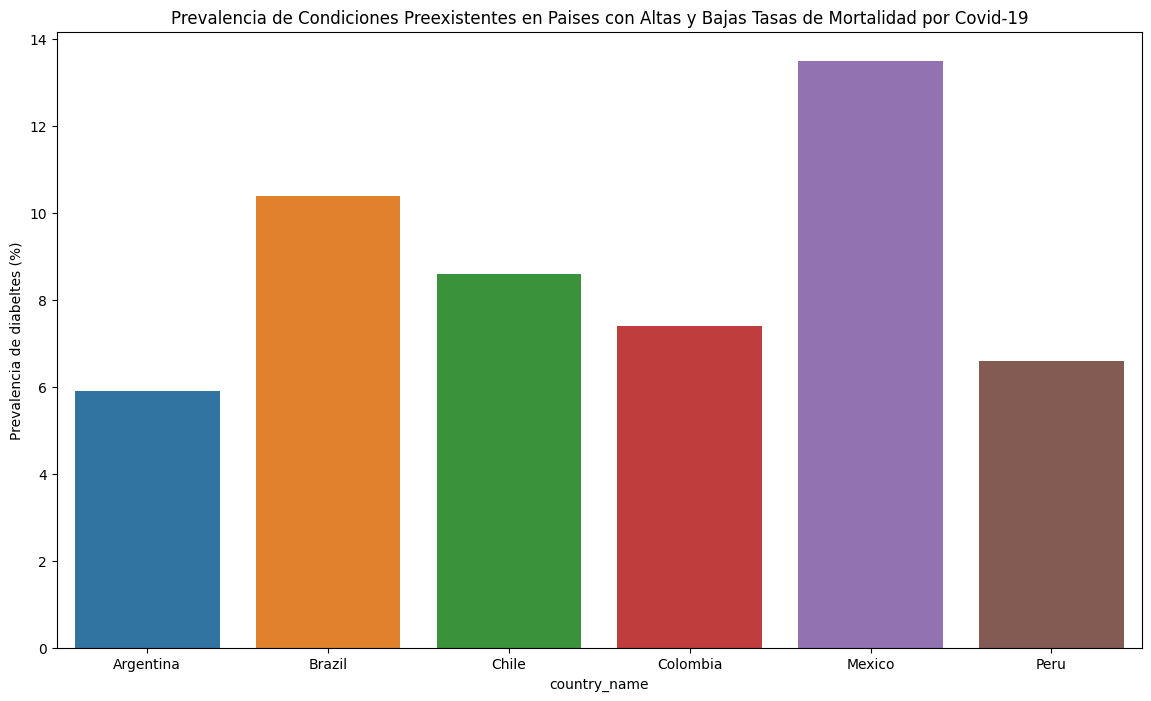

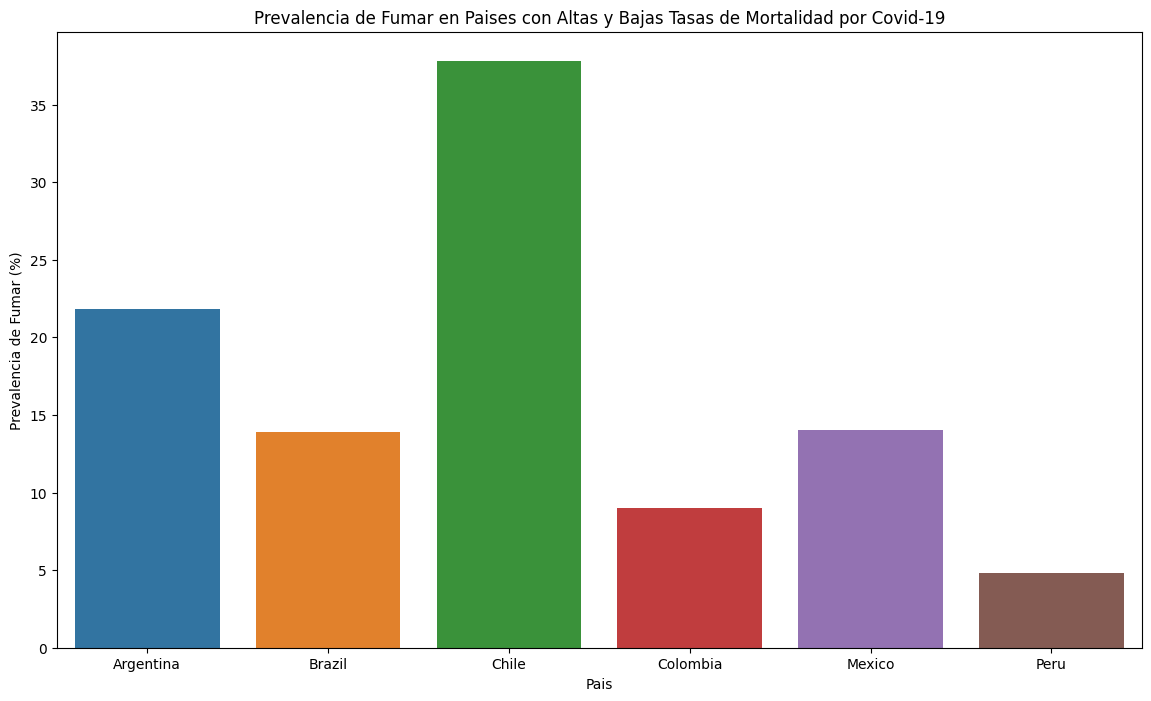

In [ ]:
#Prevalencia de Diabetes
top_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.ylabel('Prevalencia de diabeltes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Paises con Altas y Bajas Tasas de Mortalidad por Covid-19')
plt.show()

#Prevalencia de Fumar
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Paises con Altas y Bajas Tasas de Mortalidad por Covid-19')
plt.show()

Se observa a nivel general una prevalencia de diabetes mas alta que la de fumar en los países análizados, por lo cual se observa la buena implemetnación de políticas de salud pública para prevenirlo, en el caso de la diabetes México presenta una cifra alta respecto a los demás países por lo cual puede impactar en las cifras de mortalidad por que esta condición preexistente puede agravar los sintomas y aumentar la probabilidad de ingresos a la UCI. 

Análisis Temporal de la Mortalidad

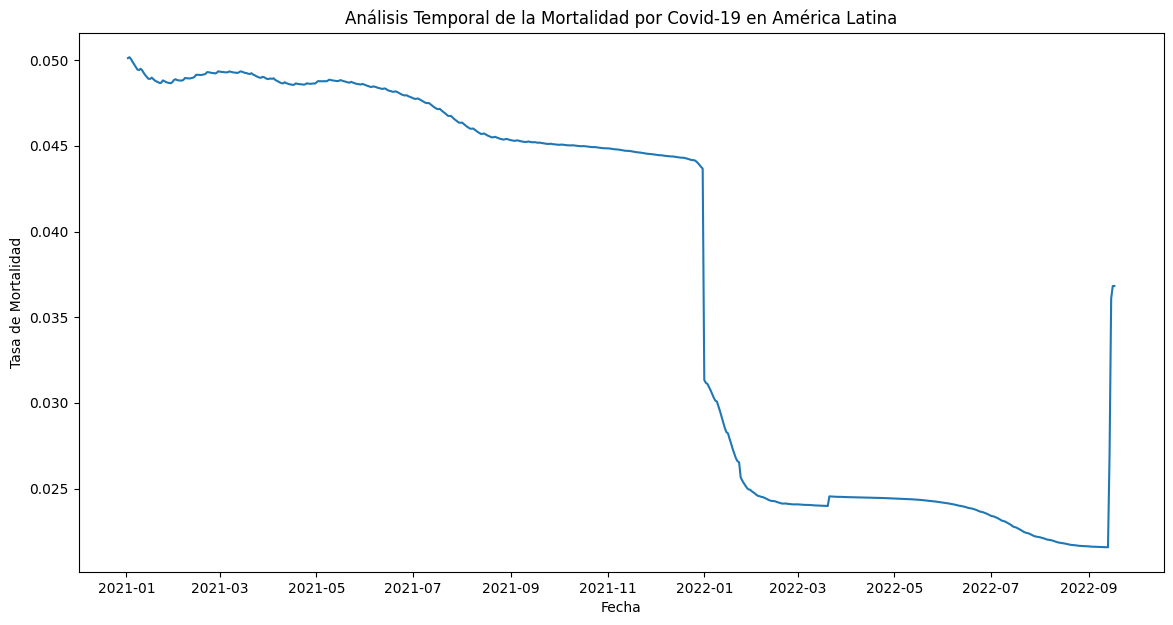

In [ ]:
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Análisis Temporal de la Mortalidad por Covid-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

A groso modo se puede observar que tanto las políticas de prevención como de vacunación surtieron efecto, debido a que la mortalidad desciende, importante destacar el repunte en el mes de septiembre del año 2022, ya que al pasar dos años de la pandemia se espera que la mayoría de las personas ya tengan inmunidad por tener el virus o estén vacunadas por lo cual se deben analizar cuáles son los otros factores que inciden en el aumento de la mortalidad, los cuales a grandes rasgos podrían ser la poca aplicación de medidas preventivas por parte de las personas.

Comparación de la Situación Actual (Contexto de los datos)

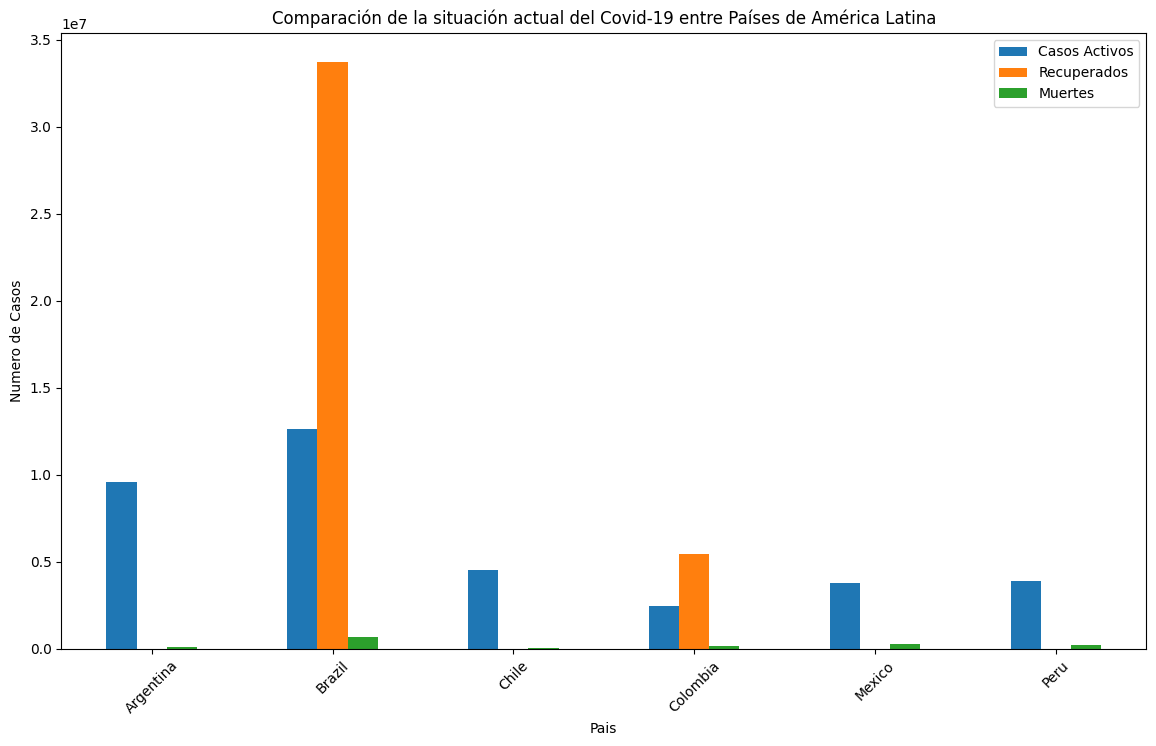

In [ ]:
current_situation=data_latinoamerica_paises.groupby('country_name').max()[['active_cases','cumulative_recovered','cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14,8))
plt.title('Comparación de la situación actual del Covid-19 entre Países de América Latina')
plt.xlabel('Pais')
plt.ylabel('Numero de Casos')
plt.legend(['Casos Activos','Recuperados','Muertes'])
plt.xticks(rotation=45)
plt.show()

Se puede observar la ausencia de datos, lo que limita obtener una conclusion mas acertada, a grandes rasgos se puede confirmar una gran diferencia entre las cifras de recuperados y los casos activos, por lo cual puede incidir de manera positiva en la disminción de las cifras de mortalidad. 

### Extra Credit

Mapa de calor con las variables de casos confirmados, muertes, dosis administradas y recuperados

In [ ]:
import folium
import folium.map
from folium.plugins import HeatMap

#Creación de mapa para observar la distribución de casos confirmados, muertes, dosis administradas y recuperados

#Selección de las columnas que se van a utilizar 
columns_mapa= ['latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns_mapa]

#Creación de un mapa centrado en América Latina 
map= folium.Map(location=[-14.235004,-51.92528], zoom_start=3)

#Creación de mapa de calor para casos confirmados 
heat_map_confirmed = HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creación de mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creación de mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creación de mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map


Se puede observar como Brasil presenta areas de calor mas marcadas respecto a los demás países, por lo cual se puede deber al factor poblacional respecto a los demás páises analizados. A nivel general, Brazil no esta presentando cifras de mortalidad tan altas a pesar de no estar implementando estrategias de vacunación efectivas, su población de alto riesgo que son los adultos mayores, no representa la mayoría. 

Matriz de coorelación indice de indicadores demográficos y muertes acumuladas

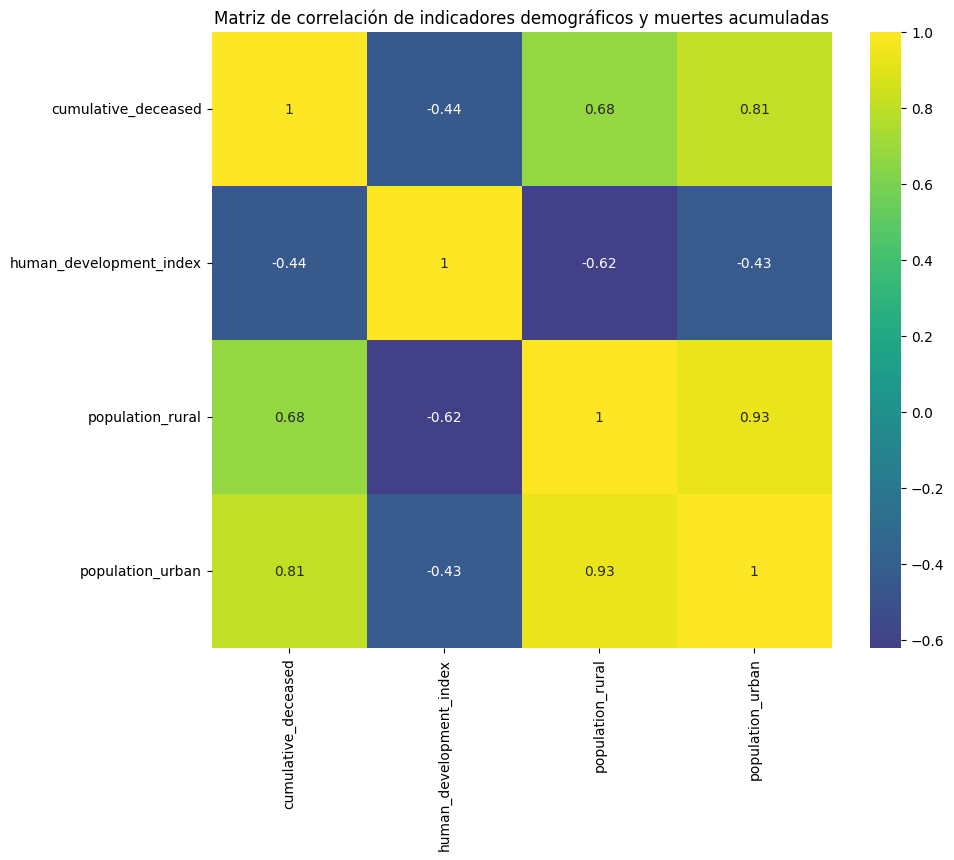

In [ ]:
#Selección de un subconjunto de columnas para el análisis de corelación
columas_corrrelacion=['cumulative_deceased','human_development_index','population_rural', 'population_urban']
correlation_matrix = data_latinoamerica_paises[columas_corrrelacion].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis',center=0)
plt.title('Matriz de correlación de indicadores demográficos y muertes acumuladas')
plt.show()

La población urbana por las condiciones en las que vive, es más propensa a contagios lo que conduciría en algunos casos  a muertes por el virus que la rural por condiciones de hacinamiento, pero el acceso en este caso a servicios de salud es más limitado que en la urbana, lo que podría incidir en la atención de los casos graves y posibles muertes al no ser atendidos de manera óptima. 
A pesar de esta limitante de acceso la baja densidad poblacional y un estilo de vida más saludable pueden incidir en los contagios y el desarrollo del virus.